Kappa 1 Ceti is on the list and is a good proxy for on of the mMEATS stars. Lots of archival data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
star = 'HIP-15457'

In [3]:
#tom ayres stis uv

In [4]:
uvpath ='/media/david/2tb_ext_hd/hddata/hwo/data/hst/HIP-15457/tayres/'
tspec = fits.getdata('{}h_hd20630_uvsum_1x_51806_spc.fits'.format(uvpath), 1)[0]

(1160.0, 1700.0)

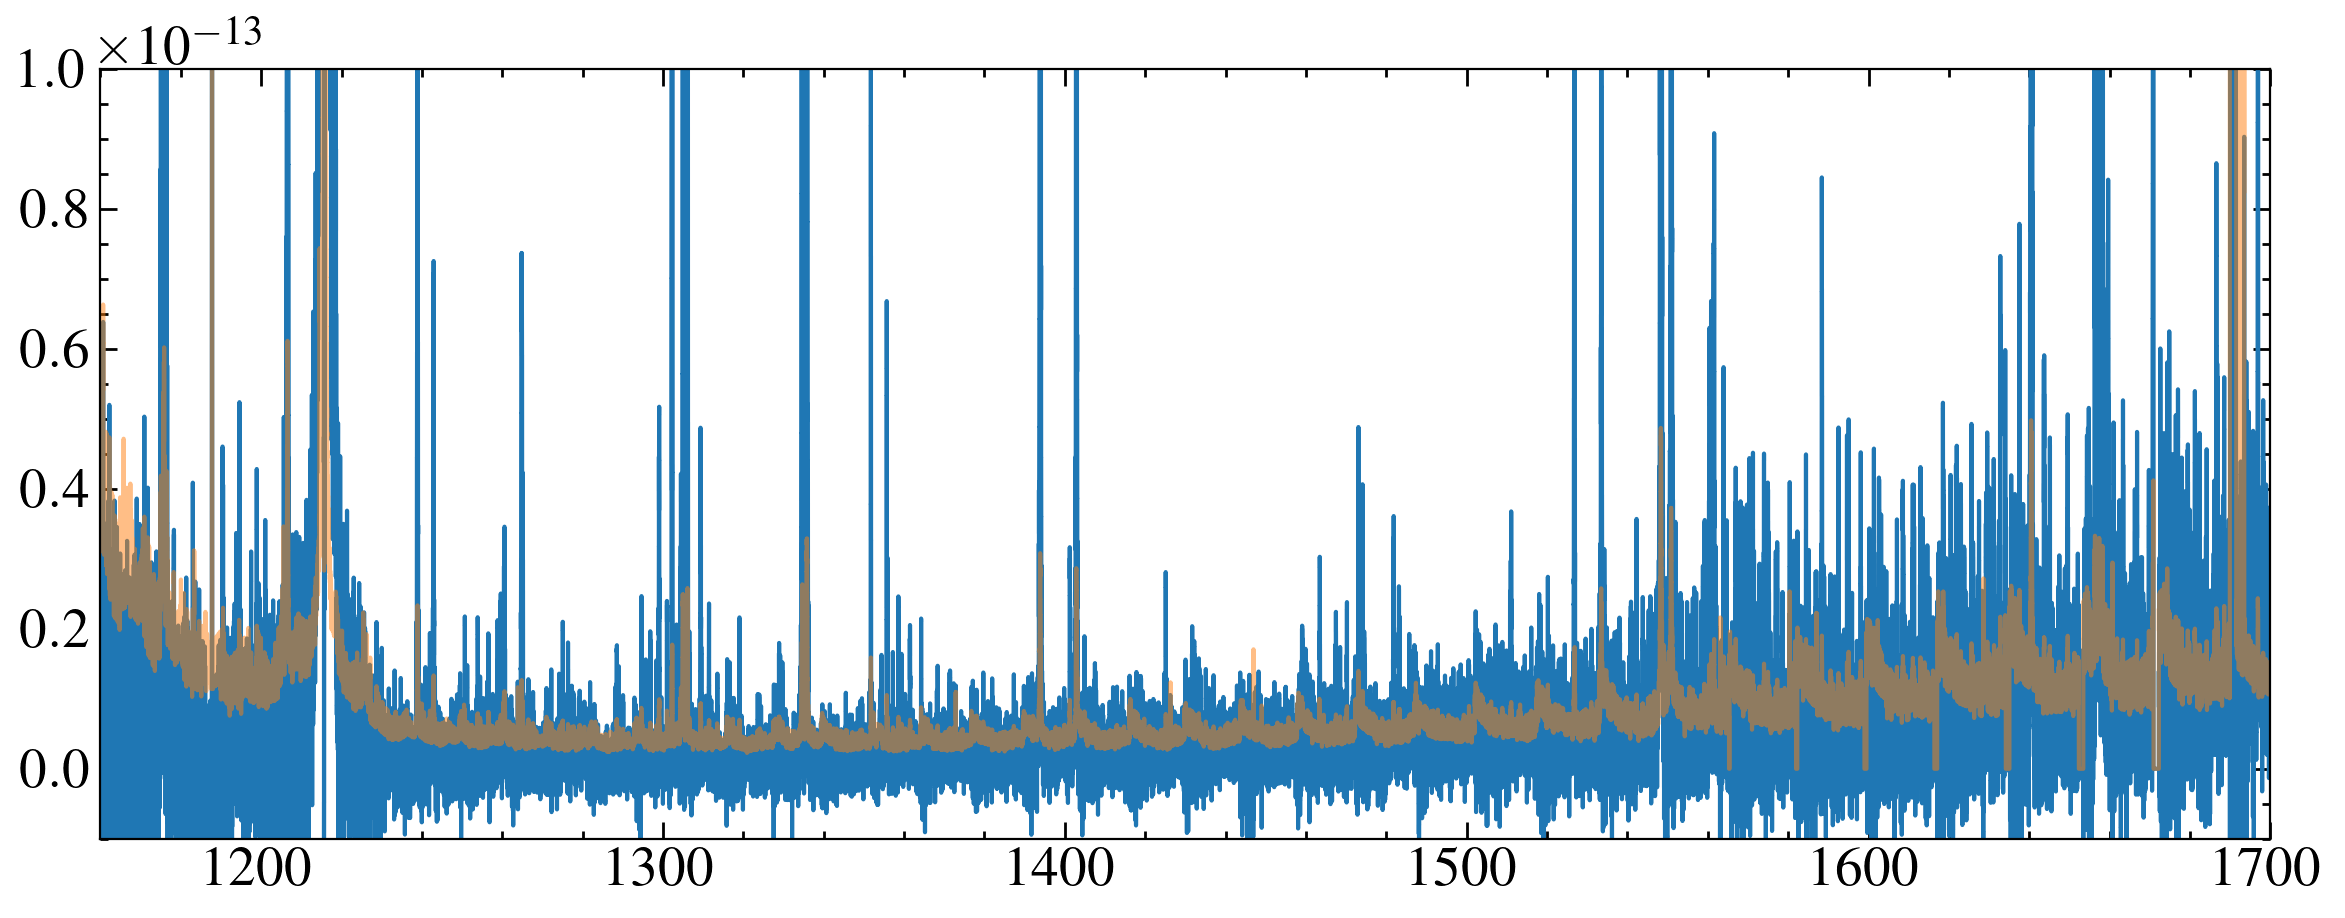

In [5]:
w_uv, f_uv, e_uv = tspec['WAVE'], tspec['FLUX'], tspec['ERROR']
plt.step(w_uv, f_uv, where='mid')
plt.step(w_uv, e_uv, where='mid', alpha=0.5)

# plt.yscale('log')
# plt.xscale('log')
plt.ylim(-0.1e-13, 0.1e-12)
plt.xlim(1160, 1700)

(2750.0, 2850.0)

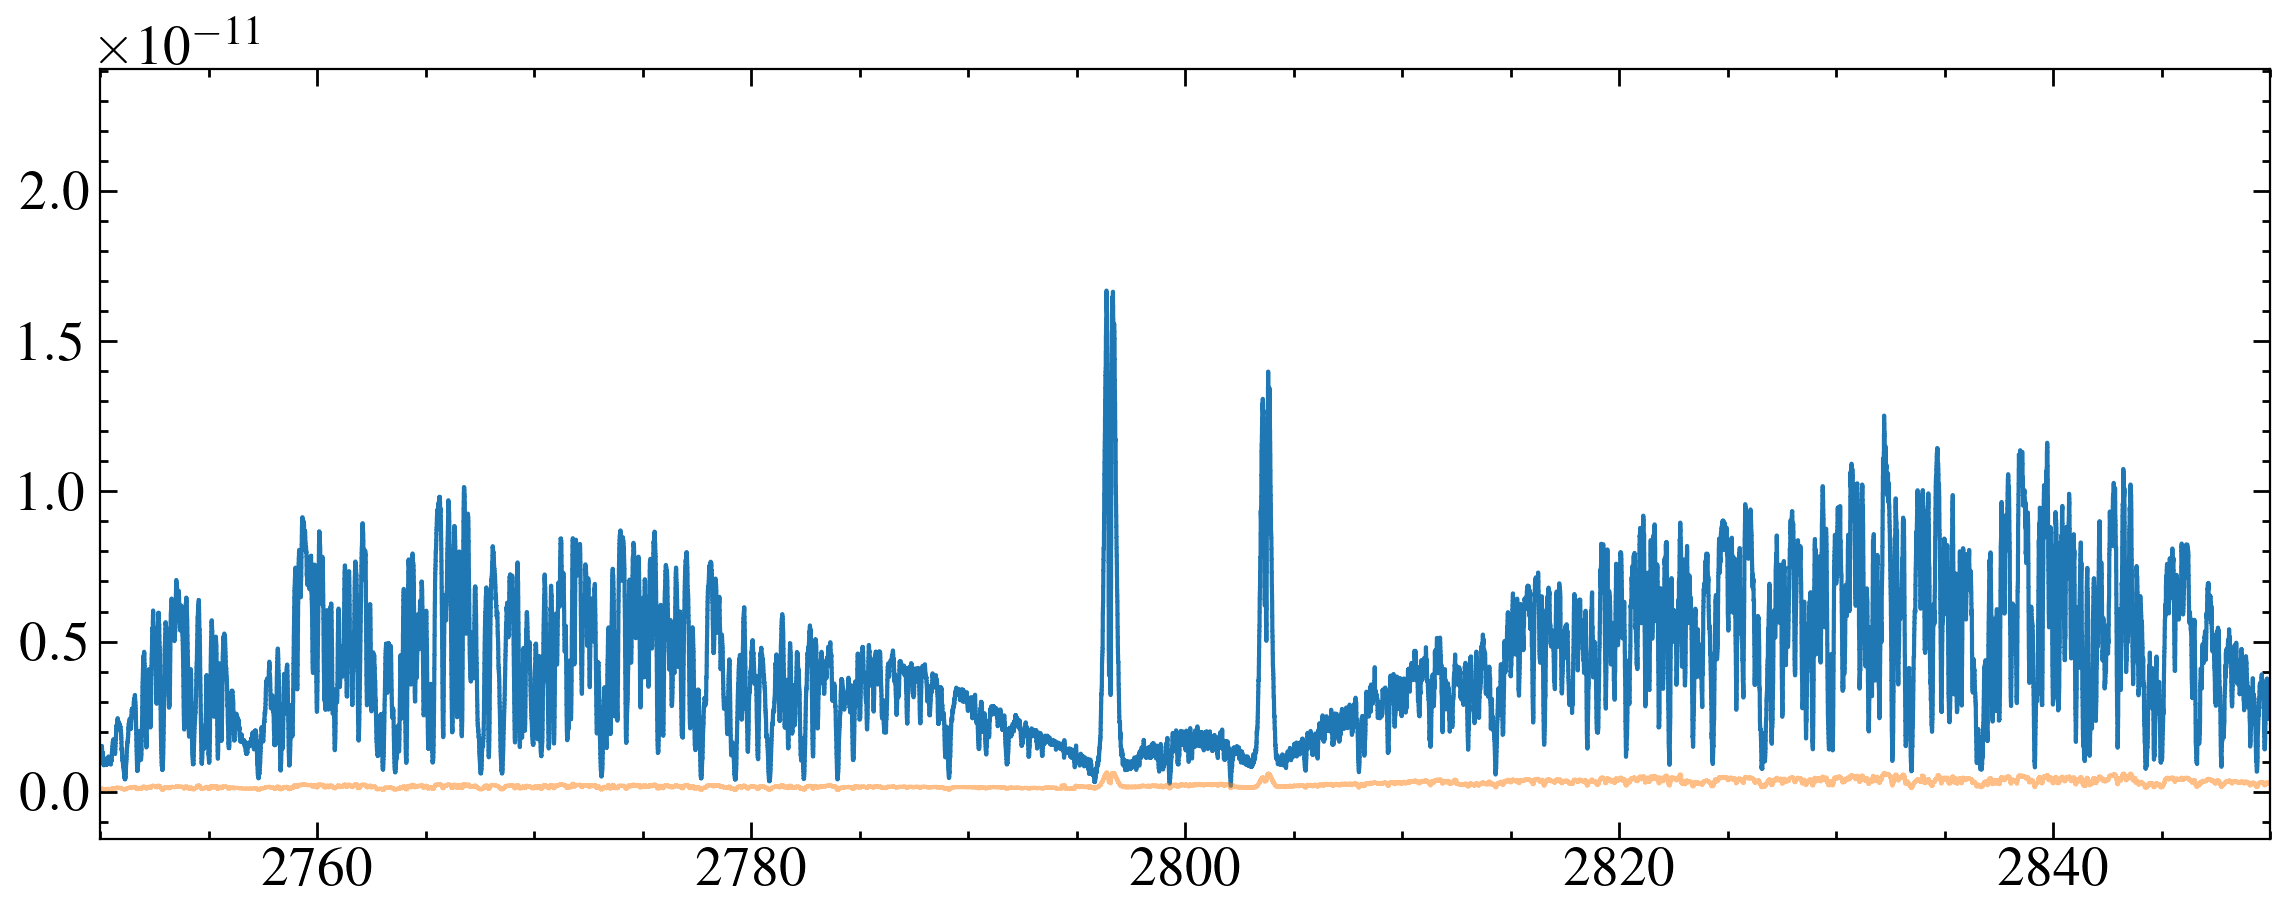

In [6]:
#mg ii
plt.step(w_uv, f_uv, where='mid')
plt.step(w_uv, e_uv, where='mid', alpha=0.5)

# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(-0.1e-13, 0.1e-12)
plt.xlim(2750, 2850)

Some CCD data I need to re-extract 

In [7]:
path = '/media/david/2tb_ext_hd/hddata/hwo/data/hst/HIP-15457/stis/'

In [8]:
import stistools
os.environ['oref'] = path

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


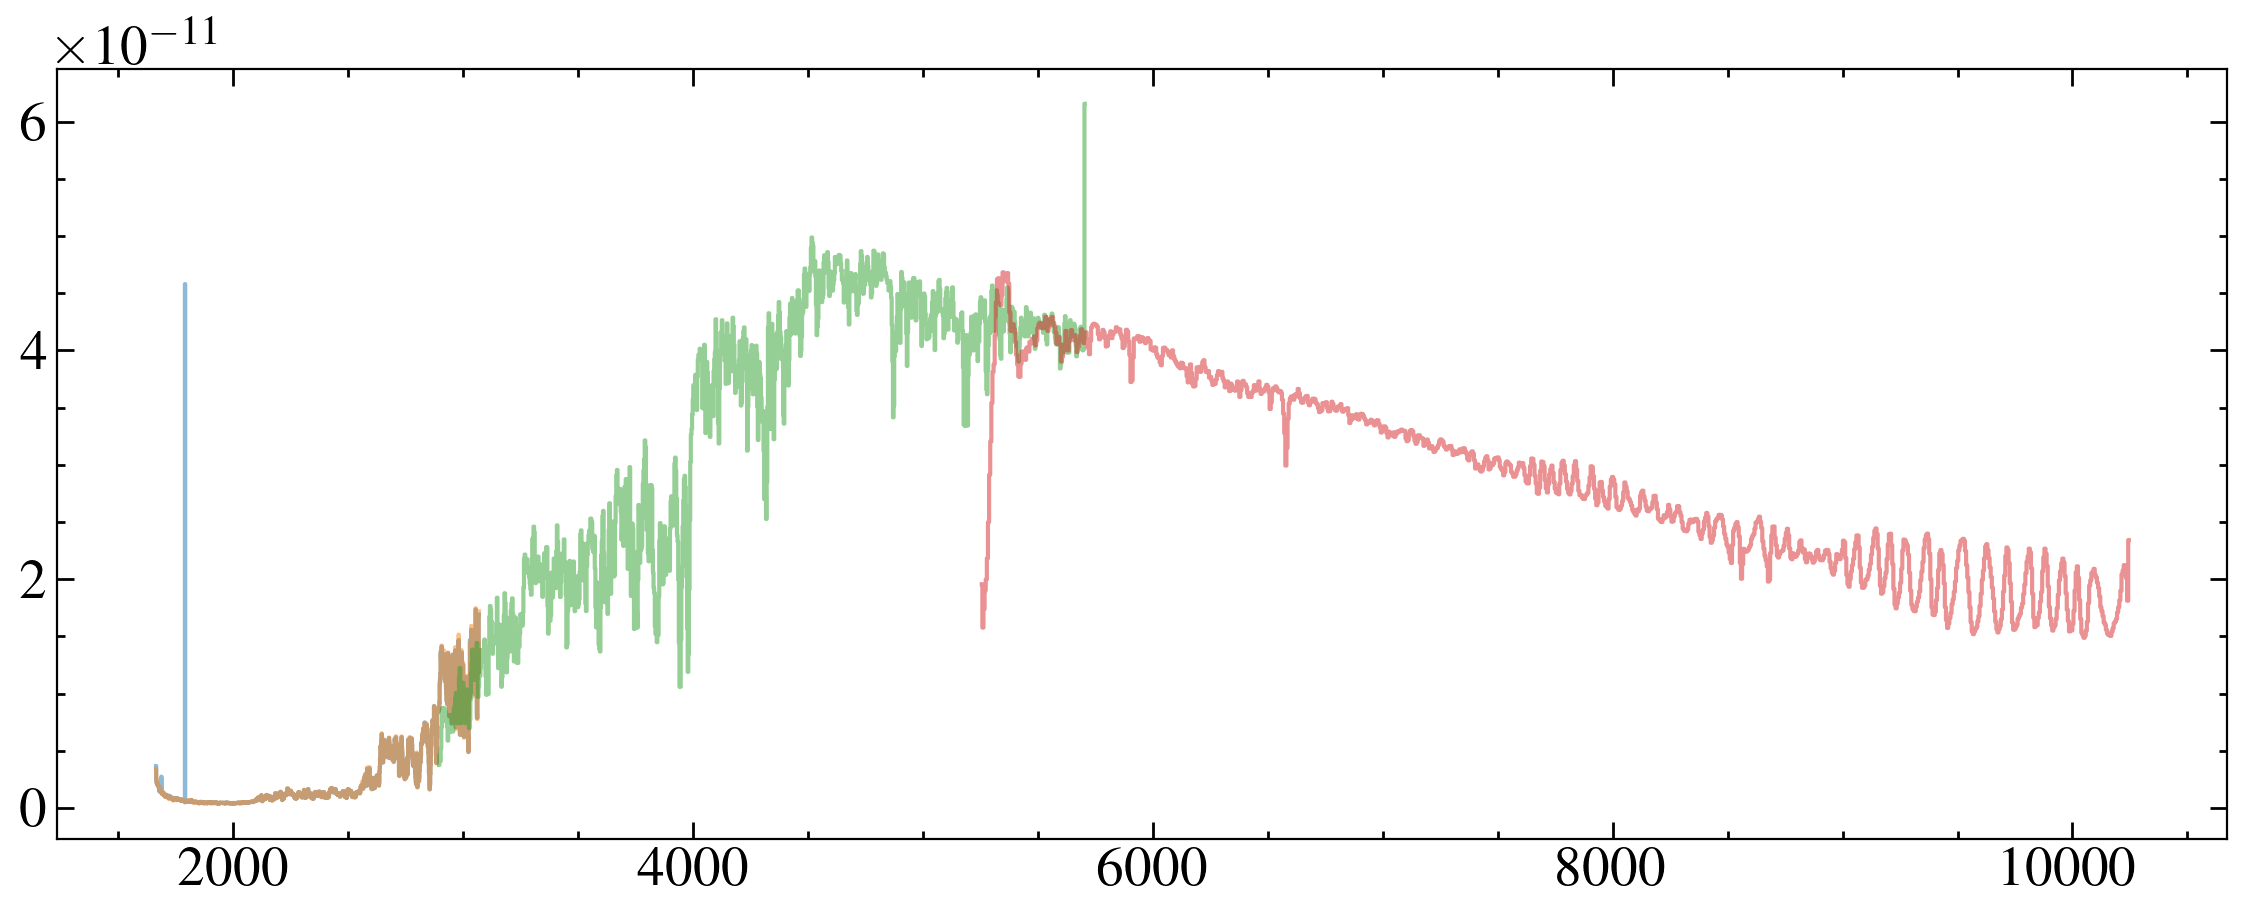

In [9]:
roots = ['O8RU3X010', 'O8RU3X020', 'O8RU3XHCQ', 'O8RU3XHDQ']

for i, root in  enumerate(roots):
    root = root.lower()
    flt = '{}/{}_flt.fits'.format(path, root)
    SPTRCTAB = fits.getheader(flt,0)['SPTRCTAB']
    grating = fits.getheader(flt,0)['OPT_ELEM']
    cenwave = fits.getheader(flt,0)['CENWAVE']
#     tracegrid = build_trace_grid(path+SPTRCTAB[5:], grating, cenwave)
    rootname = fits.getheader(flt)['ROOTNAME'] 
    outname = 'reextractions/kap1cet/{}_new_x1d.fits'.format(rootname)
    if os.path.exists(outname):
        os.remove(outname)
#     a2center = get_a2center(xs[i],ys[i], tracegrid)
#     print(root)
#     print(a2center)
    # a2center = 375
    stistools.x1d.x1d(flt, output = outname, trailer='reextractions/kap1cet/{}_new.trl'.format(rootname), bksmode='off')
    
    data = fits.getdata(outname, 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1150 
    w, f, e = w[mask], f[mask], e[mask]
    
    plt.step(w, f, where='mid', alpha=0.5)
    
# plt.xlim(1150, 1250)
# plt.ylim(-0.1e-15, 0.5e-15)
# plt.axhline(0, ls='--', c='0.5')
       

    
# # data = Table(fits.getdata('draft_hlsp/kap1cet/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits', 1))



# w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']

# plt.step(w[w > 1150], f[w > 1150], where='mid')

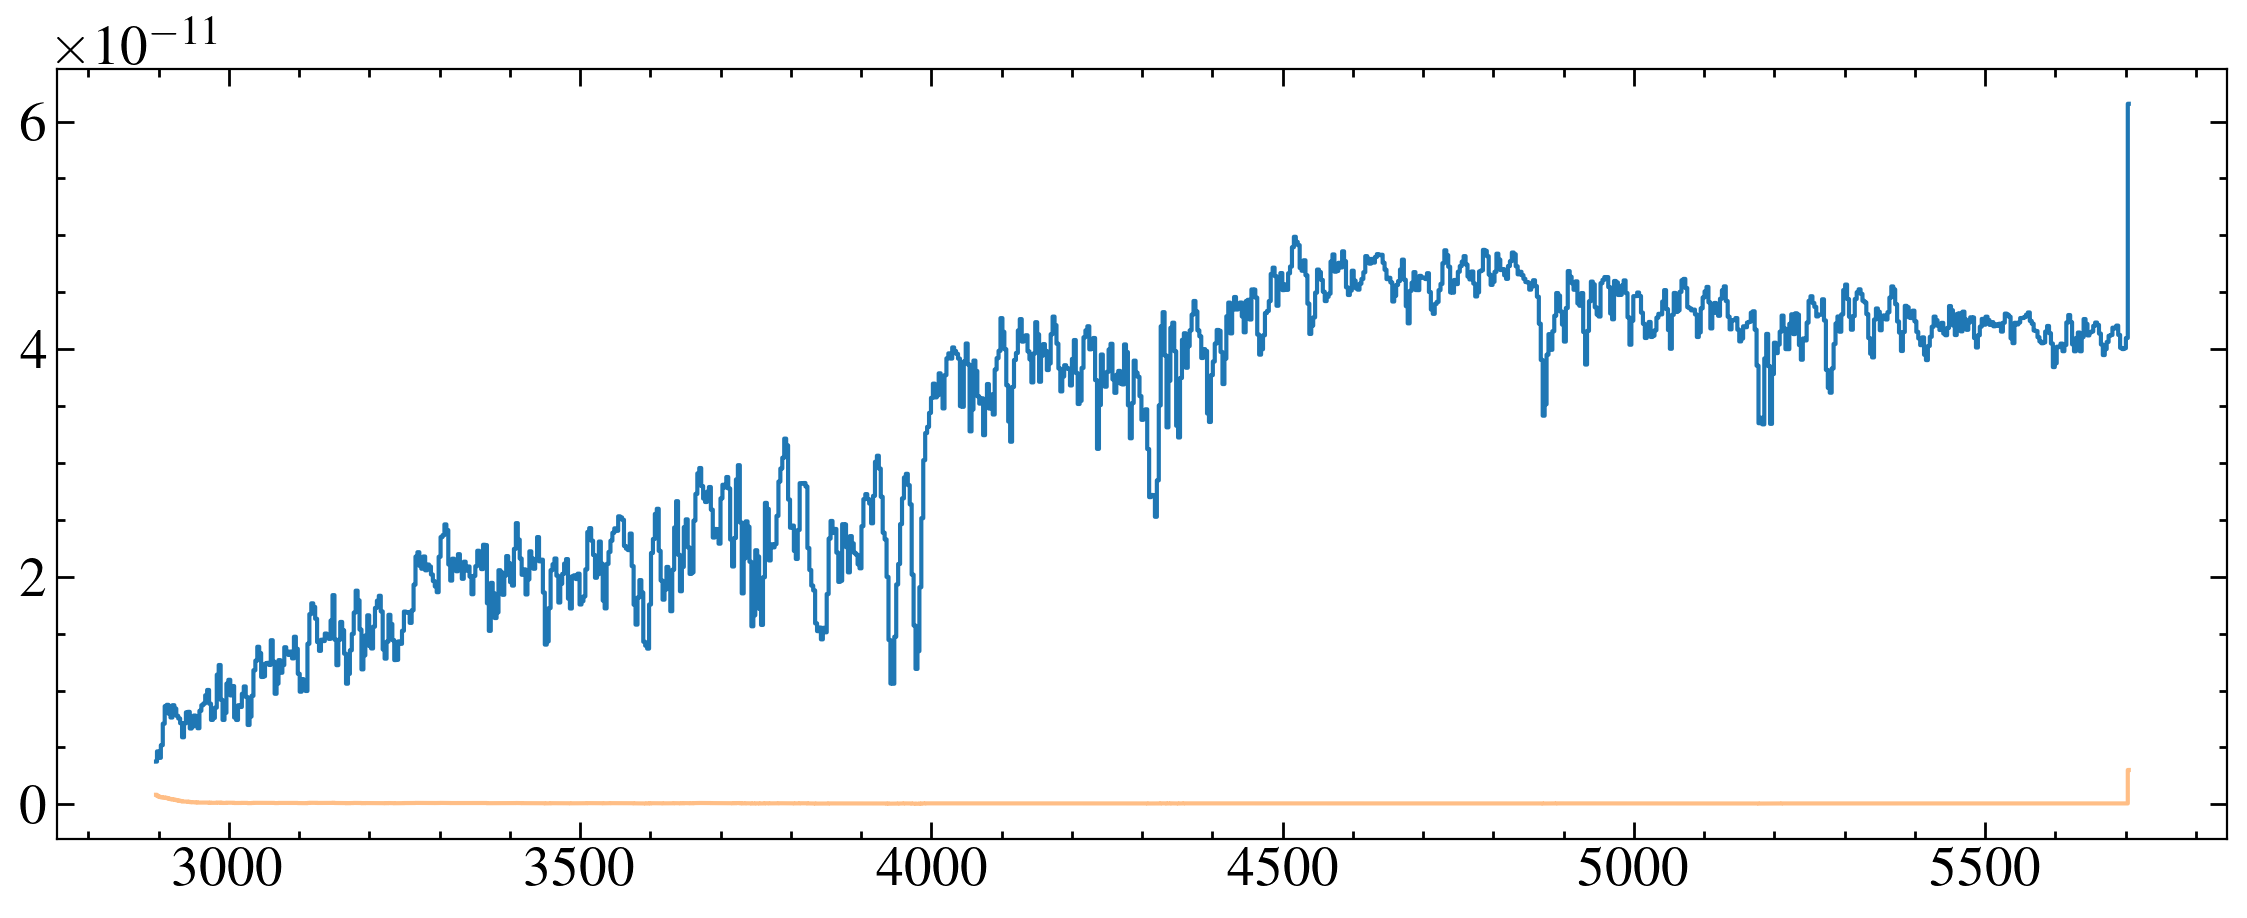

In [10]:
odata = fits.getdata('reextractions/kap1cet/o8ru3xhcq_new_x1d.fits',1)[0]
ow, of, oe= odata['WAVELENGTH'], odata['FLUX'], odata['ERROR']
plt.step(ow, of, where='mid')
plt.step(ow, oe, where='mid', alpha=0.5)

Need to defringe as well. Script it up?

In [11]:
# # for i, x in enumerate(g750ls):

# x = '{}o8ru3xhdq_raw_2_x1d.fits'.format(path)

# hdr = fits.getheader(x, 0)
# root = hdr['ROOTNAME']
# flat = hdr['FRNGFLAT']
# print(hdr['ROOTNAME'], hdr['FRNGFLAT'])
# flatpath = '{}{}'.format(path, flat.lower())
# scipath = '{}{}'.format(path, root)
# stistools.defringe.normspflat('{}_raw.fits'.format(flatpath),
#                           '{}_nsp.fits'.format(flatpath), do_cal=True,
#                           wavecal='{}_wav.fits'.format(scipath))
# with fits.open('{}_nsp.fits'.format(flatpath), mode='update') as hdulist:
#     hdulist[1].data[:,:250] = 1
    
    
# stistools.defringe.prepspec('{}{}_raw.fits'.format(path, root))
    
# mode = fits.getheader('{}_raw.fits'.format(scipath),0)['OPT_ELEM']
# if mode == "G750L":
#     prod_type = "crj"
# elif mode == "G750M":
#     prod_type = "sx2"
# # prod_type='raw_2_x2d'


# if os.path.exists('{}_frr.fits'.format(flatpath)):
#     os.remove('{}_frr.fits'.format(flatpath))

# stistools.defringe.mkfringeflat('{}_{}.fits'.format(scipath, prod_type), '{}_nsp.fits'.format(flatpath),
#                                 '{}_frr.fits'.format(flatpath), beg_shift=-0.5, end_shift=2, shift_step=0.1,
#                                 beg_scale=0.8, end_scale=1.7, scale_step=0.04)

# stistools.defringe.defringe('{}_{}.fits'.format(scipath, prod_type), '{}_frr.fits'.format(flatpath), overwrite=True)

# outpath = '{}defringed/'.format(path)
# outname = '{}{}_defringed_x1d.fits'.format(outpath, root)

# if os.path.exists(outname):
#     os.remove(outname)

# drj = '{}_drj.fits'.format(scipath)
# trl = '{}{}.trl'.format(outpath, root)
# stistools.x1d.x1d(drj, output = outname, trailer=trl)

# fig, ax = plt.subplots()
# olddata = fits.getdata(x, 1)[0]
# w0, f0 , e0 = olddata['WAVELENGTH'], olddata['FLUX'], olddata['ERROR']

# newdata = fits.getdata(outname, 1)[0]
# w1, f1 , e1 = newdata['WAVELENGTH'], newdata['FLUX'], newdata['ERROR']

# plt.plot(w0, f0)
# plt.plot(w0, e0)
# plt.plot(w1, f1)
# plt.plot(w1, e1)
# plt.show()

Ok give up on that for now, might ask helpdesk. Not a helpful answer

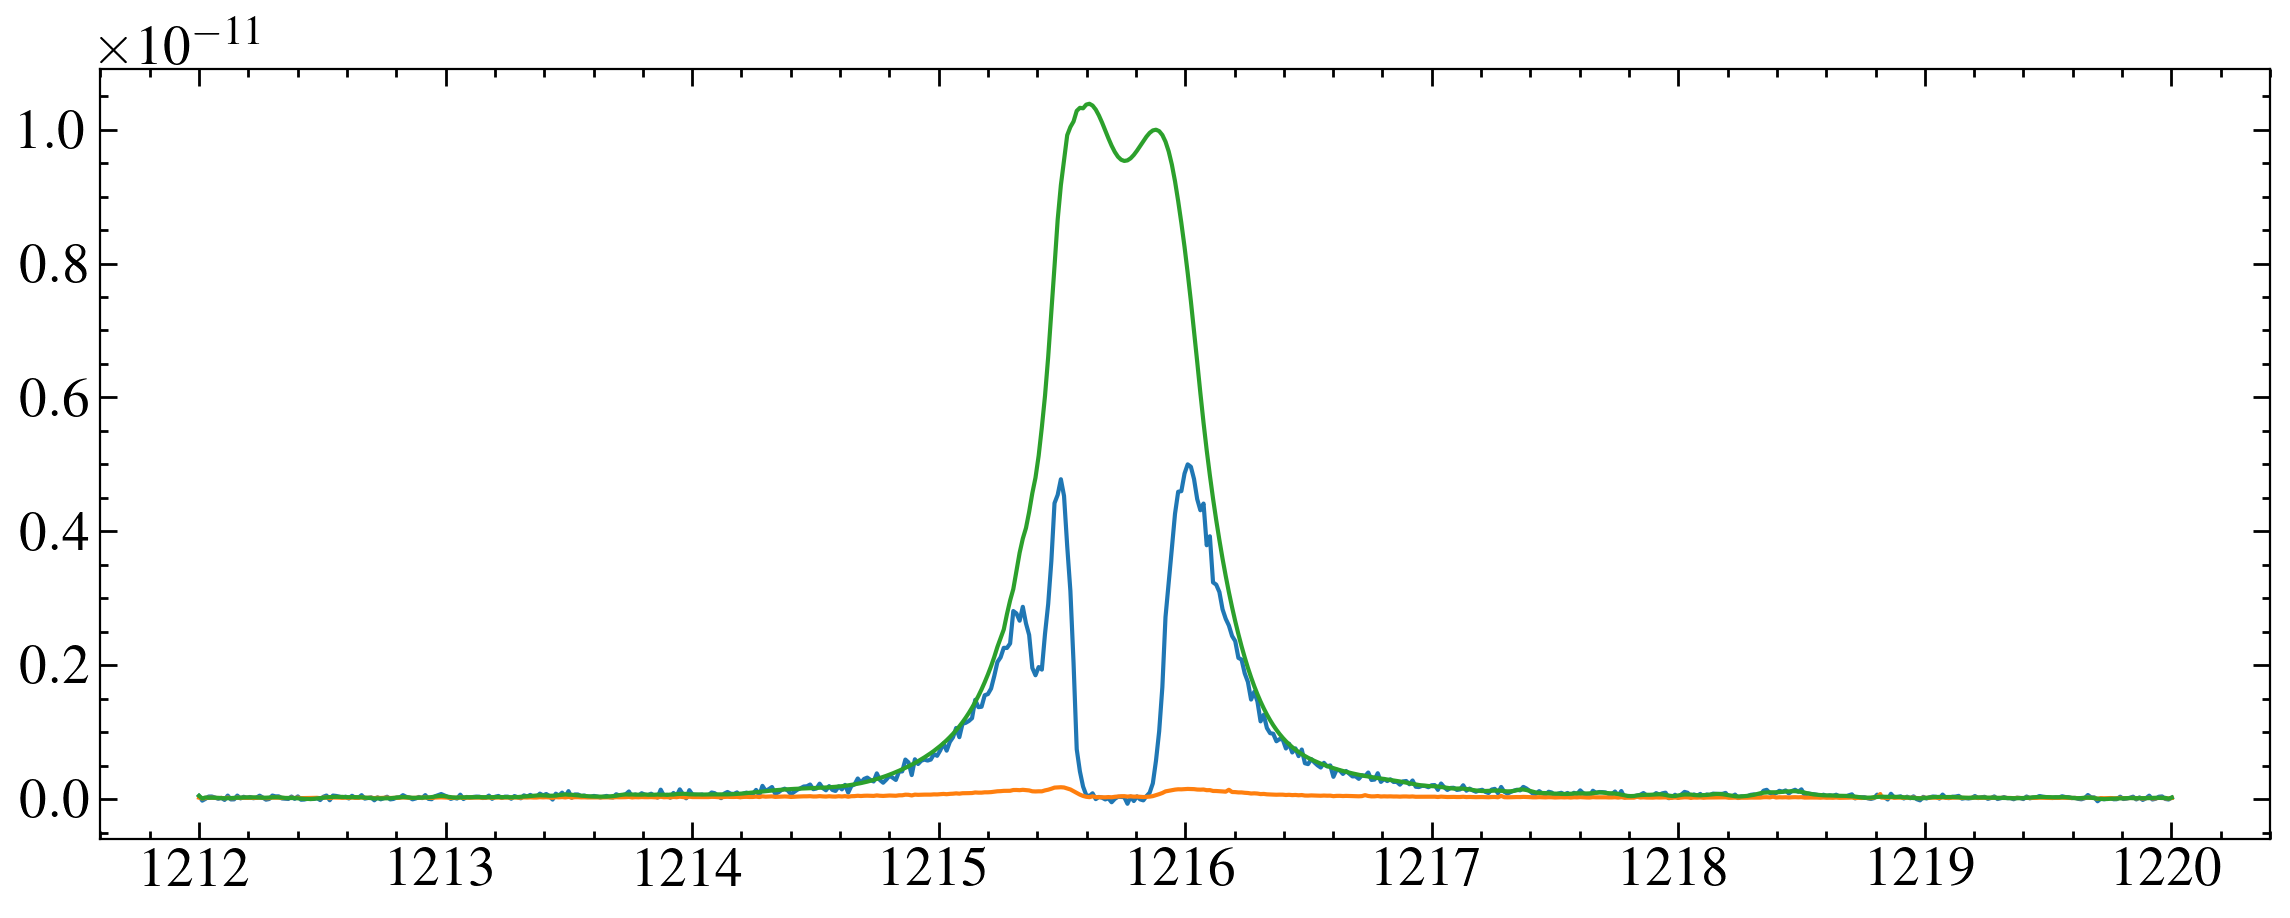

In [12]:
lyapath = '/media/david/2tb_ext_hd/hddata/hwo/data/lya/kap1cet/kcet_lya.txt'
lyaw, lyaf, lyae, lyamod = np.loadtxt(lyapath, unpack =True)
plt.plot(lyaw, lyaf)
plt.plot(lyaw, lyae)
plt.plot(lyaw, lyamod)

plt.show()
# lyamask = (lyamod > 0.0)
# plt.plot(lyaw[lyamask], (lyaf/lyamod)[lyamask])
# print(np.max(lyaf))

['CHANNEL', 'FLUX', 'ERROR']
2512
562


/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/astropy/units/core.py:1047: RuntimeWarning: invalid value encountered in divide
  return func(_condition_arg(v) / scale1) * scale2
/tmp/ipykernel_373062/3544204709.py:9: RuntimeWarning: invalid value encountered in divide
  ex = (xdata['ERROR']/xdata['FLUX']) * fx


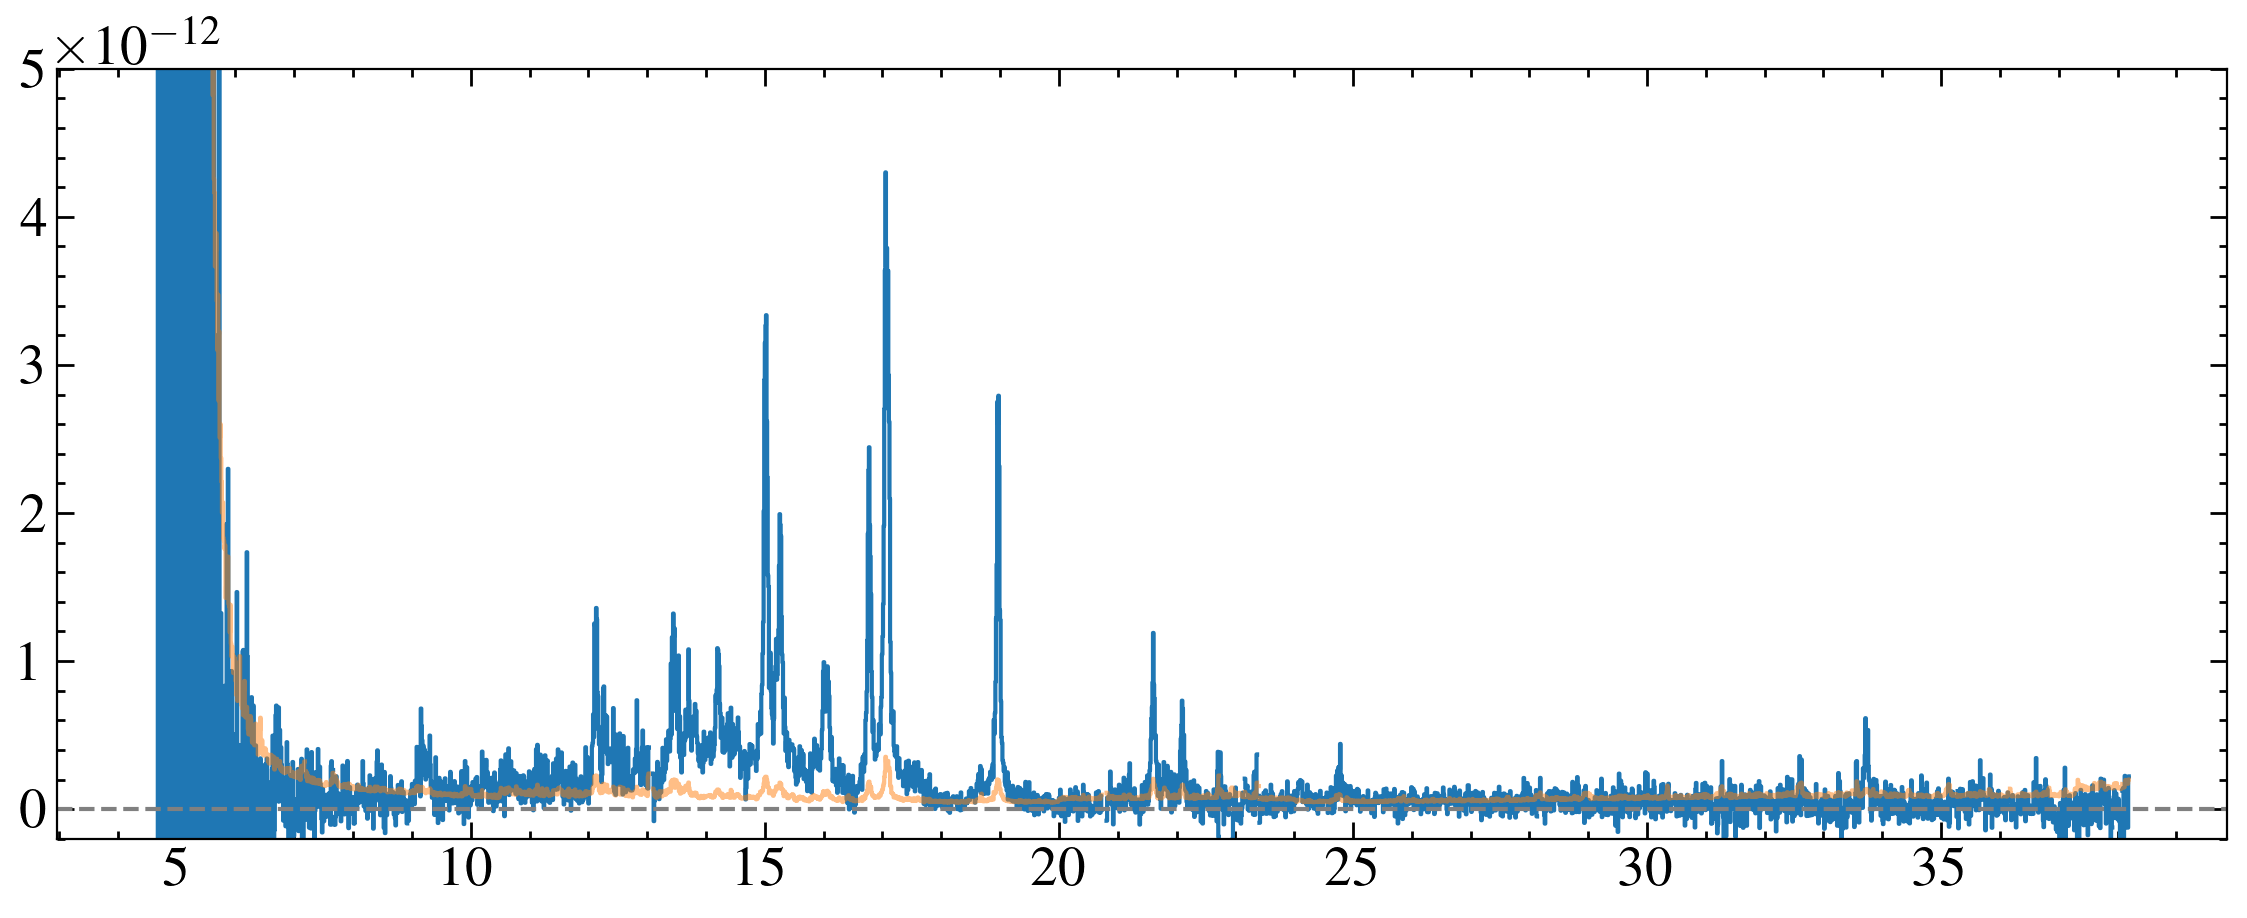

In [13]:
xpath = '/media/david/2tb_ext_hd/hddata/hwo/data/xmm/kap1cet/xray.fits'
xdata = fits.getdata(xpath, 1)
print(xdata.names)
# plt.plot(xdata['CHANNEL'], xdata['FLUX'])


wx = xdata['CHANNEL']*u.AA
fx  = (xdata['FLUX'] * (u.photon/u.s/u.cm**2/u.AA)).to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wx))
ex = (xdata['ERROR']/xdata['FLUX']) * fx

plt.step(wx, fx, where='mid')
plt.step(wx, ex, where='mid', alpha =0.5)

wx, fx, ex = wx.value, fx.value, ex.value

plt.ylim(-0.2e-12, 5e-12)
plt.axhline(0, ls='--', c='0.5')

mask = wx > 7
print(len(fx[mask][fx[mask] > 0]))
print(len(fx[mask][fx[mask] < 0]))

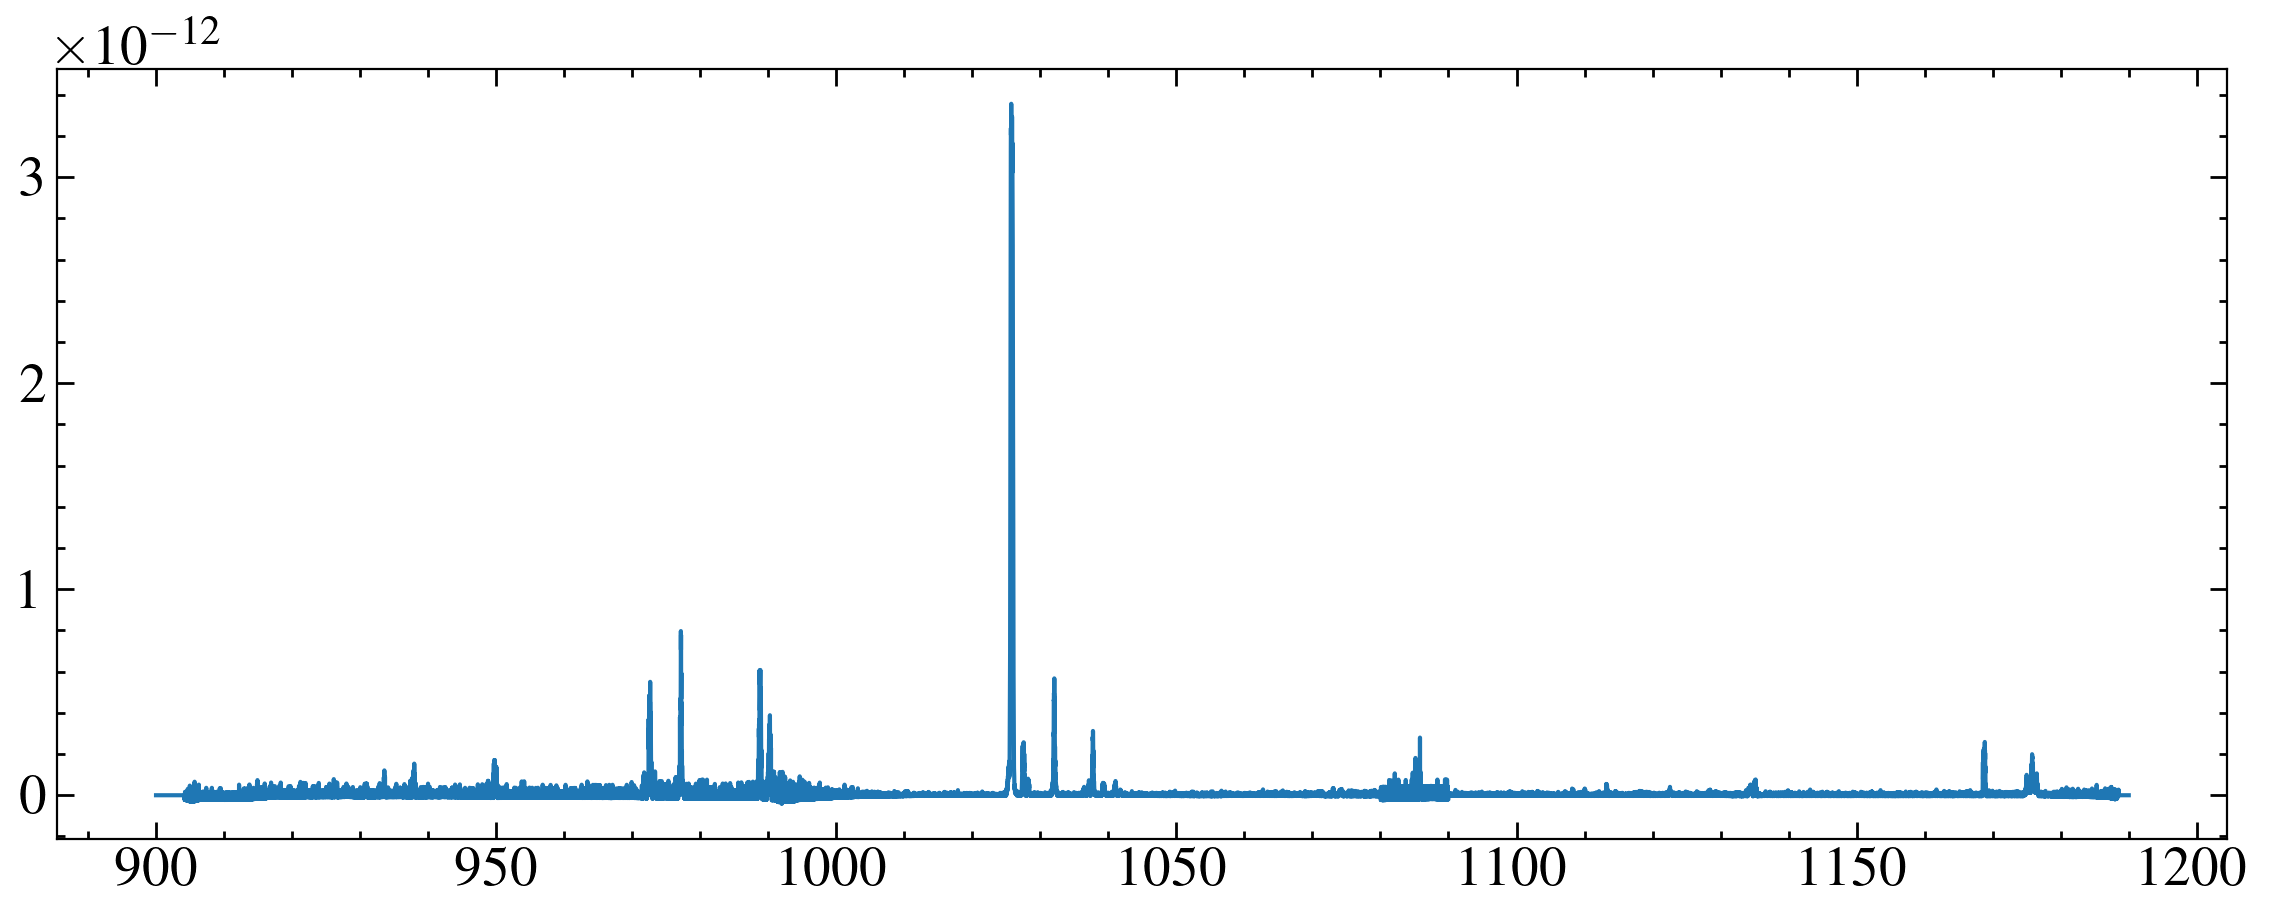

In [14]:
fusepath = '/media/david/2tb_ext_hd/hddata/hwo/data/fuse/kap1cet/fuse.fits'
fdata = fits.getdata(fusepath, 1)[0]
plt.plot(fdata['WAVE'], fdata['FLUX'])

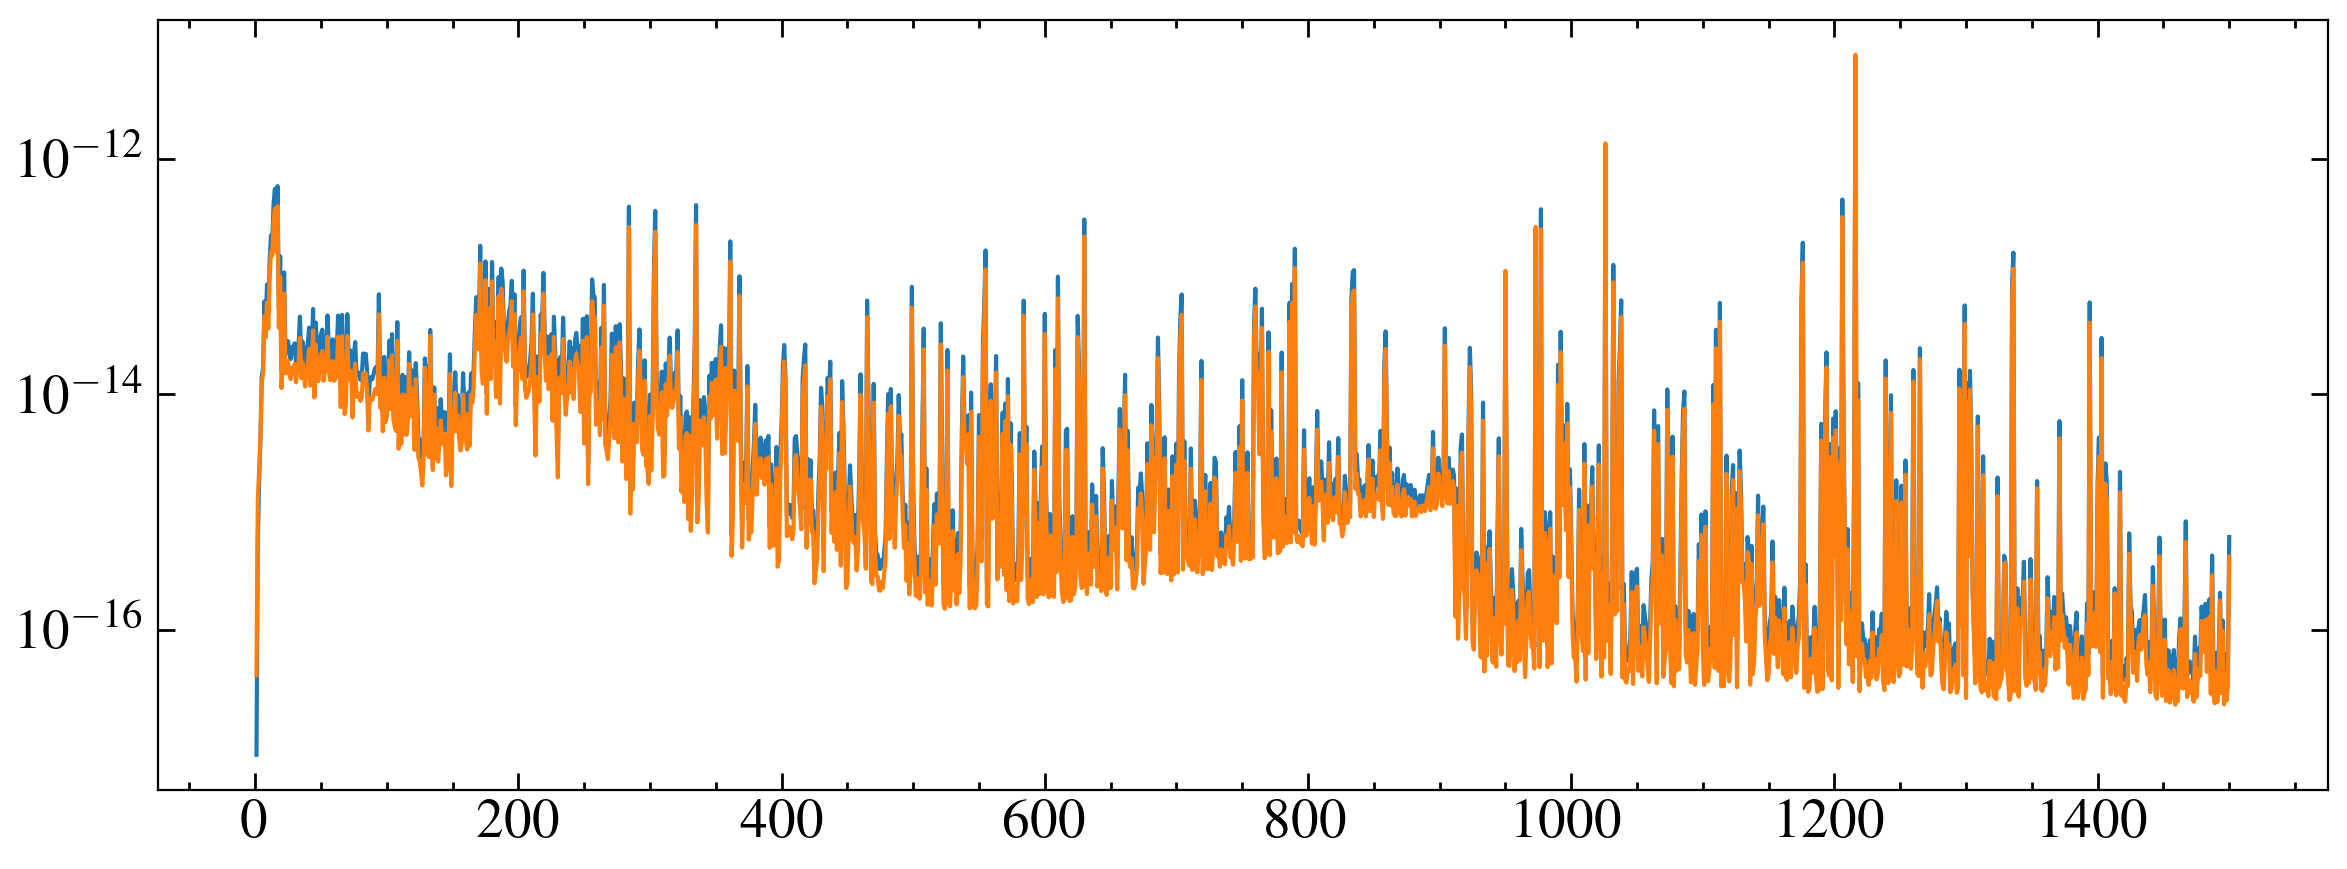

In [15]:
dempath = '/media/david/2tb_ext_hd/hddata/meats/dems/kap1cet/spectrum_kappa_ceti_p17.fits'
dem = fits.getdata(dempath, 1)

dw, df= dem['Wavelength'], dem['Flux_density']
eu, el = dem['Upper_Error_84'], dem['Lower_Error_16']


mean_e = np.mean([eu, el], axis=0)
# plt.plot(dw, mean_e)
# plt.yscale('log')

log_mean_e = (eu - el) / (np.log(eu)- np.log(el))

plt.plot(dw, df)
plt.plot(dw, log_mean_e)
# plt.plot(dw, mean_e)

plt.yscale('log')

demtab = Table([dw, df, log_mean_e], names=['WAVELENGTH', 'FLUX', 'ERROR'])
demtab.write('models/kap1cet_dem.ecsv', overwrite=True)

In [16]:
# plt.step(wx[(wx >7)], fx[(wx >7)], alpha=0.5, where='mid')
# plt.plot(dw[dw>7], df[dw>7], alpha=0.5)
# plt.step(fdata['WAVE'], fdata['FLUX'], alpha=0.5, where='mid')
# plt.plot(lyaw, lyamod, alpha=0.5)
# plt.step(w_uv, f_uv, where='mid', alpha=0.5)
# plt.step(ow, of, where='mid', alpha=0.5)

# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1e-15)

In [17]:
import importlib
import prepare_phoenix_svo as pp
importlib.reload(pp)

<module 'prepare_phoenix_svo' from '/home/david/work/meats/SEDs/prepare_phoenix_svo.py'>

In [18]:
#params from HWO list


G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)

mass = 0.98
teff = 5709
teff_e = 11
radius = 0.946
distance = 9.2762
save_path = 'models/'
star = 'kap1cet'
# g = ((G*mass*M)/(radius*R)**2).to(u.cm/u.s**2)
# print(np.log10(g.value))
g = 4.510
repo = '/media/david/2tb_ext_hd/hddata/mega_muscles/data-vacuum/'

star_params = {'Teff': teff, 'logg': g, 'FeH': 0.00, 'aM': 0, 'Radius':radius*u.R_sun, 'Distance':distance*u.pc, 'Teff_e':teff_e}
# pw, pf, pe = pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=False, make_error=True)
normfac = ((radius*R)/(distance*u.pc.to(u.m)))**2
pdata = Table.read('models/kap1cet_phoenix_interpolated.ecsv')
pw, pf, pe =  pdata['WAVELENGTH'], pdata['FLUX'], pdata['ERROR'] 

In [19]:
# plt.plot(pw, pf*normfac)
# plt.yscale('log')
# plt.xscale('log')

(1e-15, 1.682307347502852e-10)

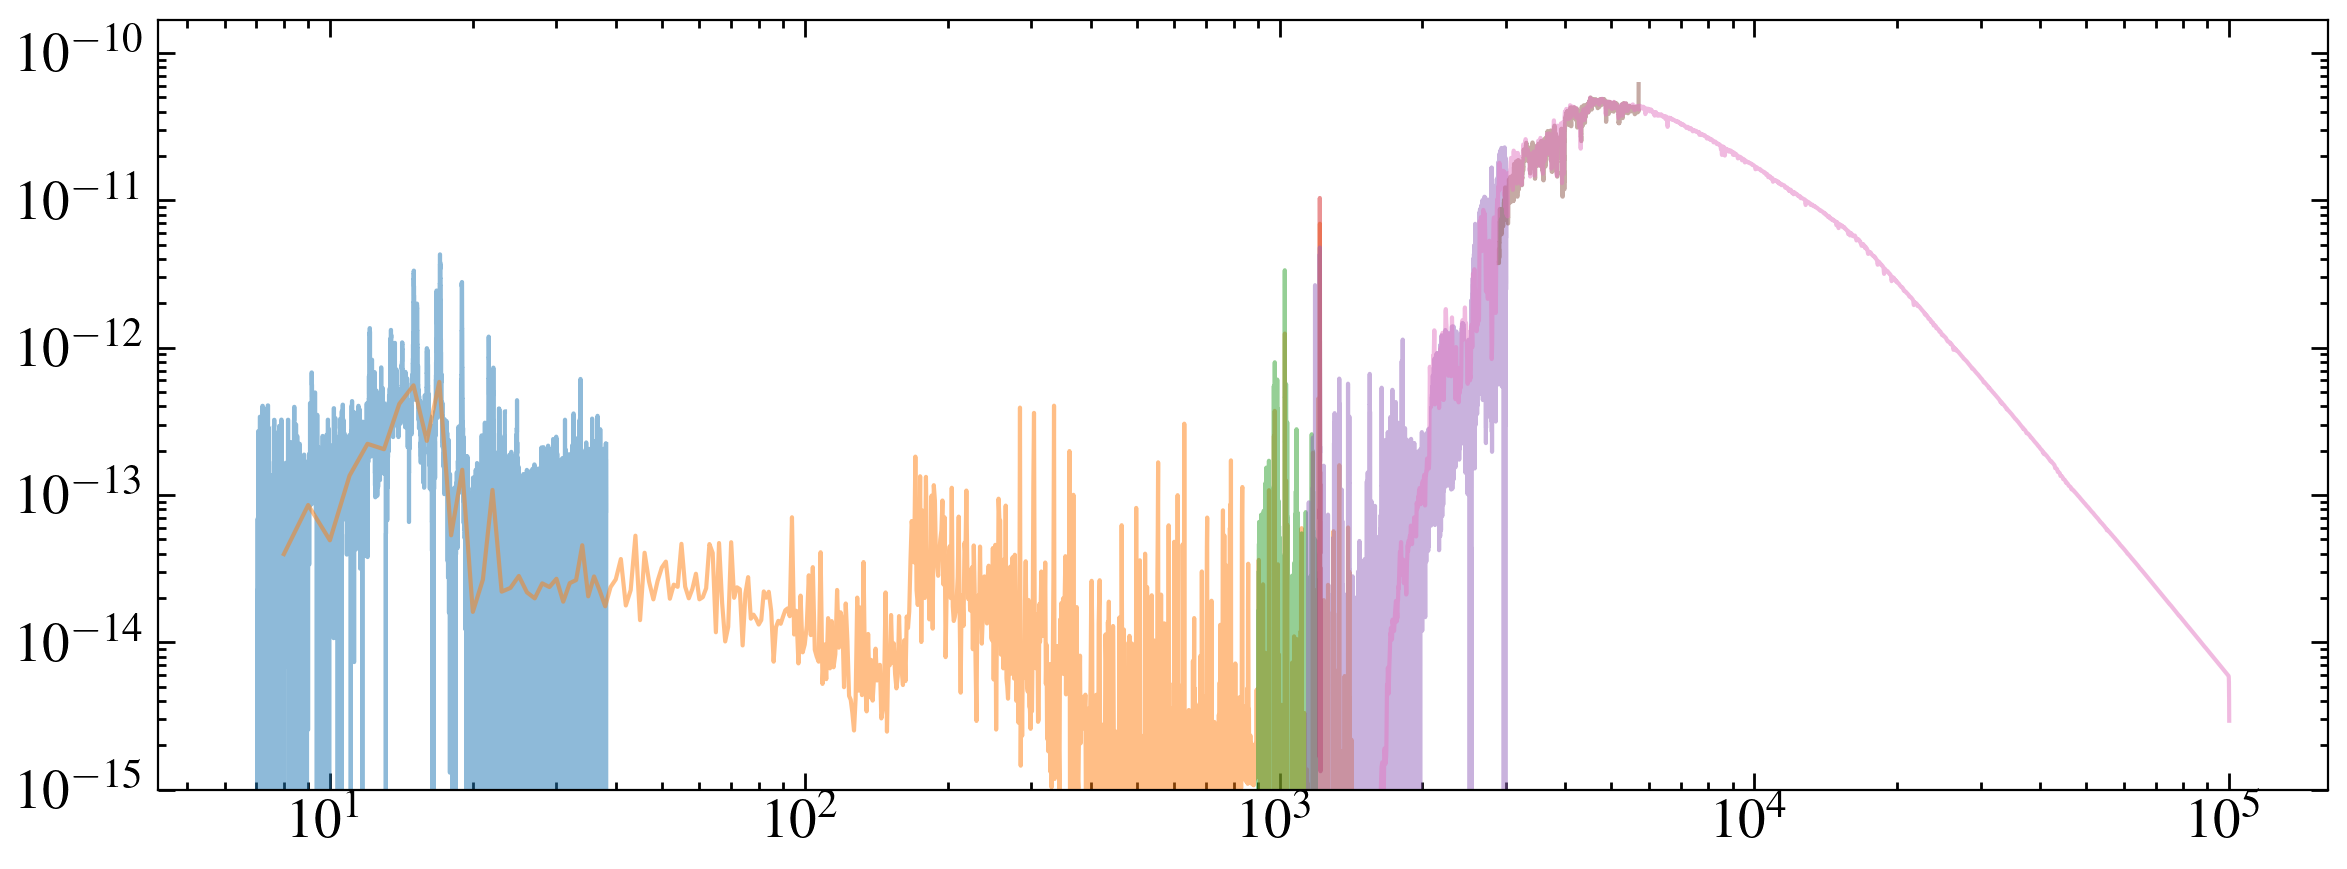

In [20]:
pmask = (pw > 1500) & (pw < 1e5)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 1000)

plt.step(wx[(wx >7)], fx[(wx >7)], alpha=0.5, where='mid')
plt.plot(dw[dw>7], df[dw>7], alpha=0.5)
plt.step(fdata['WAVE'], fdata['FLUX'], alpha=0.5, where='mid')
plt.plot(lyaw, lyamod, alpha=0.5)
plt.step(w_uv, f_uv, where='mid', alpha=0.5)
plt.step(ow, of, where='mid', alpha=0.5)
plt.plot(pwi, pfi, alpha=0.5)

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-15)

(1000.0, 4000.0)

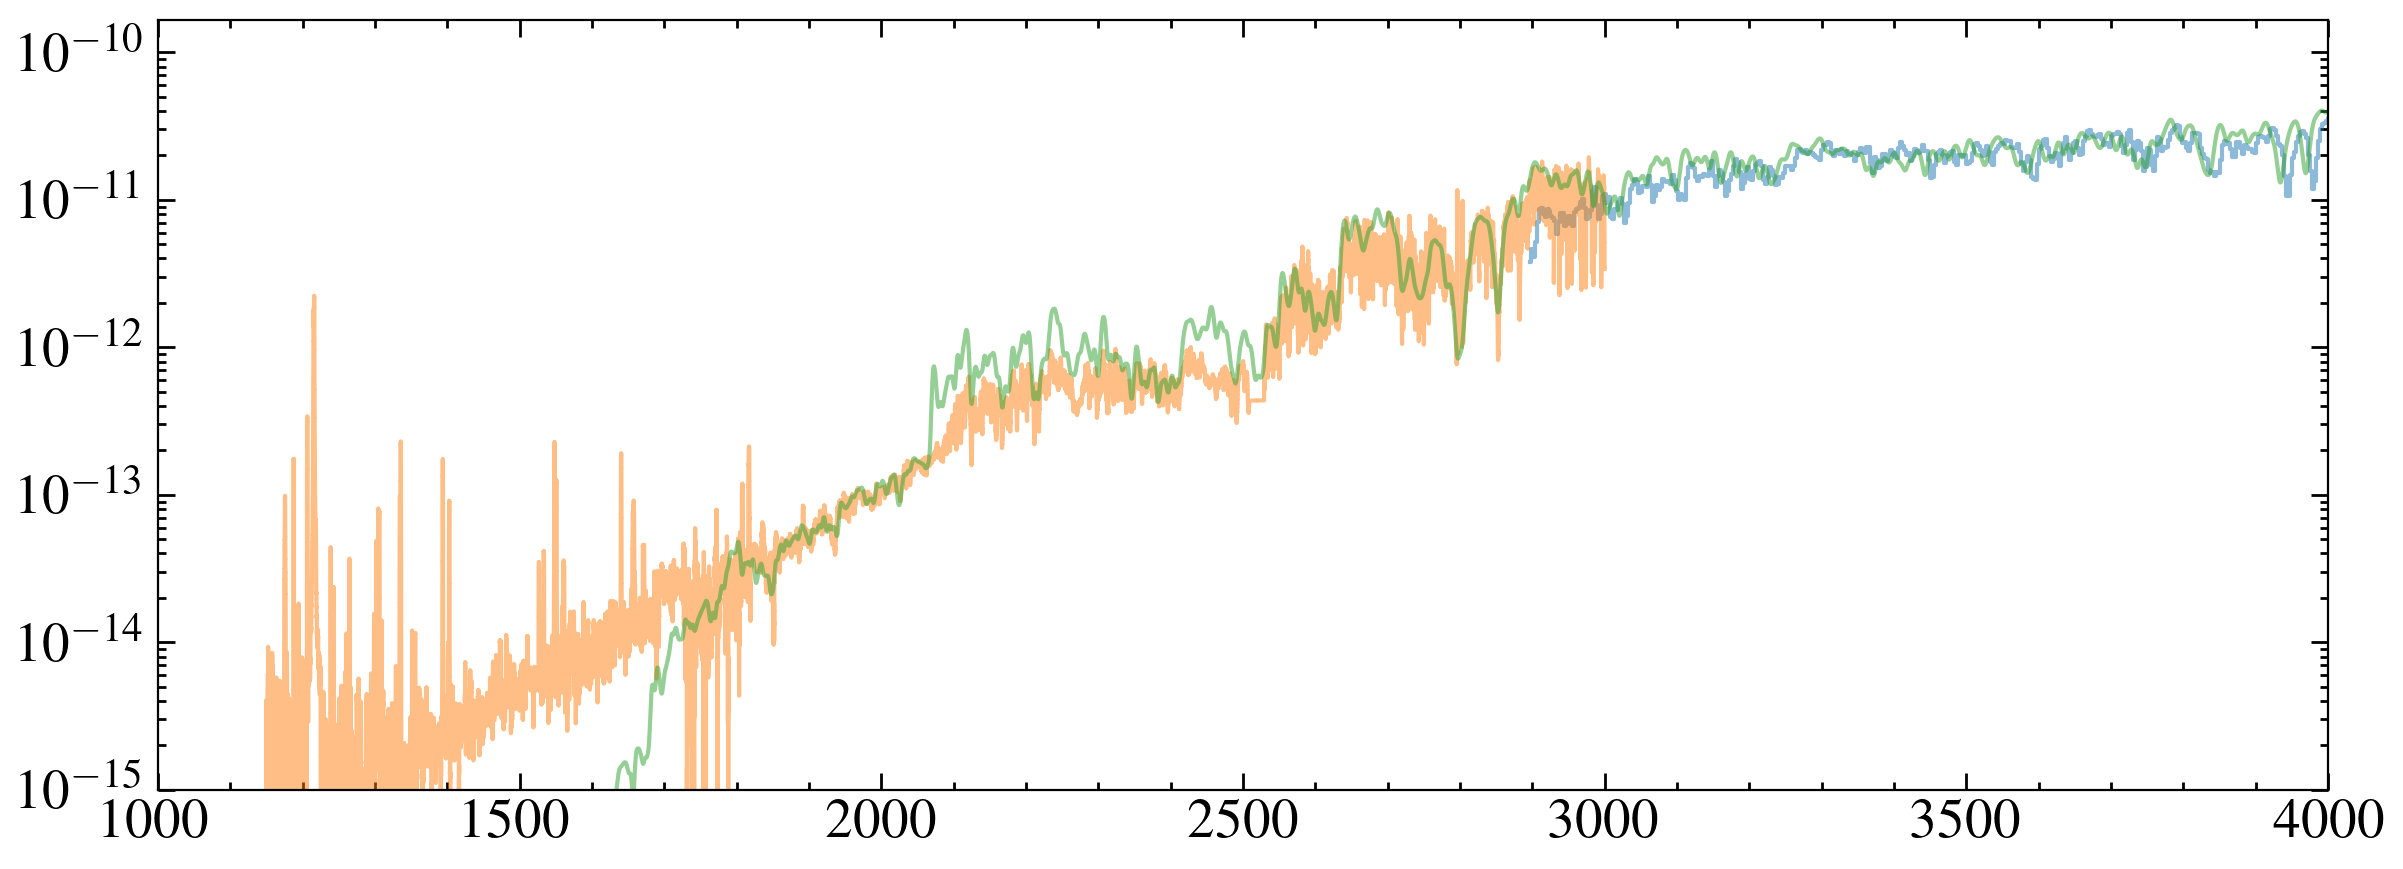

In [21]:
f_uvi = convolve(f_uv, Box1DKernel(100)) 
plt.step(ow, of, where='mid', alpha=0.5)

plt.step(w_uv, f_uvi, where='mid', alpha=0.5)
plt.plot(pwi, pfi, alpha=0.5)
plt.yscale('log')
# plt.xscale('log')
plt.ylim(1e-15)
plt.xlim(1000, 4000)

Need to draft up how to add a StarCat spectrum to the SED

In [22]:
egdat = fits.getdata('draft_hlsp/tau_ceti/hlsp_muscles_multi_multi_tau_ceti_broadband_v1_var-res-sed.fits', 1)
print(egdat.names)

['WAVELENGTH', 'WAVELENGTH0', 'WAVELENGTH1', 'FLUX', 'ERROR', 'EXPTIME', 'DQ', 'EXPSTART', 'EXPEND', 'INSTRUMENT', 'NORMFAC', 'BOLOFLUX', 'BOLOERR']


In [23]:
hdul = fits.open('{}h_hd20630_uvsum_1x_51806_spc.fits'.format(uvpath))
print(hdul[1].data.names)

['WAVE', 'FLUX', 'ERROR', 'DQ']


In [24]:
hdul[0].header

SIMPLE  =                    T /Written by IDL:  Mon May 25 12:35:45 2009       
BITPIX  =                    8 /                                                
NAXIS   =                    0 /                                                
EXTEND  =                    T /File contains extensions                        
NEXTEND =                    1 / number of extensions in file                   
FILENAME= 'h_hd20630_uvsum_1x_51806_spc.fits' / name of file                    
FILETYPE= 'SCI'                / type of data found in data file                
DATE    = '2009-05-25'         /                                                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'STIS'               / instrument used to acquire data                
EQUINOX =               2000.0 / equinox of celestial coord. system             
                            

In [25]:
def wavelength_edges(w):
    """
    Calulates w0 and w1
    """
    diff = np.diff(w)
    diff0 = np.concatenate((np.array([diff[0]]), diff)) #adds an extravalue to make len(diff) = len(w)
    diff1 = np.concatenate((diff, np.array([diff[-1]]))) #adds an extravalue to make len(diff) = len(w)
    w0 = w - diff0/2.
    w1 = w + diff1/2.
    return w0, w1

In [26]:
# # ['WAVELENGTH', 'WAVELENGTH0', 'WAVELENGTH1', 'FLUX', 'ERROR', 'EXPTIME', 'DQ', 'EXPSTART', 'EXPEND', 'INSTRUMENT', 'NORMFAC'.]

# def find_stis_header(component_repo)
#     """
#     Looks for a stis hlsp and gets the header from it to start an SED table.
#     """
#     stis_files = glog.glob('{}*stis*.fits')
#     hdr = fits.getheader(stis_files[0])
#     return hdr


# def add_starcat(sed_table, component_repo, instrument_list, remove_negs=False, to_1A=False  **kwargs):
#     """
#     Adds a starcat spectrum. For now, assume that the spectrum will be the only thing in it's wavelength range apart from Lyman alpha.
#     """
#     starcatpath = glob.glob(component_repo+'*uvsum*.fits')
#     stardata = Table(fits.getdata(starcatpath), 1)
#     hdr = fits.getheader(starcatpath, 0)
#     data = Table([stardata['WAVE']], names =['WAVELENGTH'])
#     w0, w1 = wavelength_edges(data['WAVELENGTH'])
#     data['WAVELENGTH0'] = w0
#     data['WAVELENGTH1'] = w1
#     data['FLUX'] = stardata['FLUX']
#     data['ERROR'] = stardata['ERROR']
#     data['EXPTIME'] = np.fill(len(data['WAVELENGTH']), hdr['EXTIME'])
#     data['DQ'] = stardata['DQ']
#     data['EXPSTART'] = np.fill(len(data['WAVELENGTH']), hdr['EXPSTART'])
#     data['EXPEND'] = np.fill(len(data['WAVELENGTH']), hdr['EXPEND'])
#     if remove_negs:
#     print('removing negatives from {}'.format(specpath))
#     data = negs.make_clean_spectrum(data)
#     if to_1A:
#         print('binning {}'.format(specpath))
#         data = bin1A.spectrum_to_const_res(data)
    
   
#     inst_code = instruments.getinsti()
#     data['INSTRUMENT'] = np.full(len(data['WAVELENGTH']), inst_code, dtype=int)
#     data['NORMFAC'] = np.fill(len(data['WAVELENGTH']), 1.0)
    
    
#     if 'lya' in kwargs:
#         mask = (data['WAVELENGTH'] > trims[0]) &  (data['WAVELENGTH'] < lya[0]) | (data['WAVELENGTH'] > lay[1]) &  (data['WAVELENGTH'] < trims[1])
#     else:
#         mask = (data['WAVELENGTH'] > trims[0]) &  (data['WAVELENGTH'] < trims[1])
#     data = data[mask]
    
#     if kwargs['Ebv'] != 0.0:
#         data = deredden(data, kwargs['Ebv'])
    
                    
                
              
#     if len(sed_table) == 0: #check if the SED is new.
#         sed_table = data
#         hlspheader = find_stis_header(component_repo)
#         sed_table.meta = dict(hlsphdr)
        
#     return sed_table, instrument_list()
    

        
#     # g430l = g430l[mask]
    

Need to hack a hlsp file - adding a MEATS HLSP header to the starcat file. Easier - just take a header file from a stis spectrum.

In [27]:
import prepare_stis

/home/david/work/meats/SEDs/prepare_stis.py:36: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / (e_array**2)
/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,


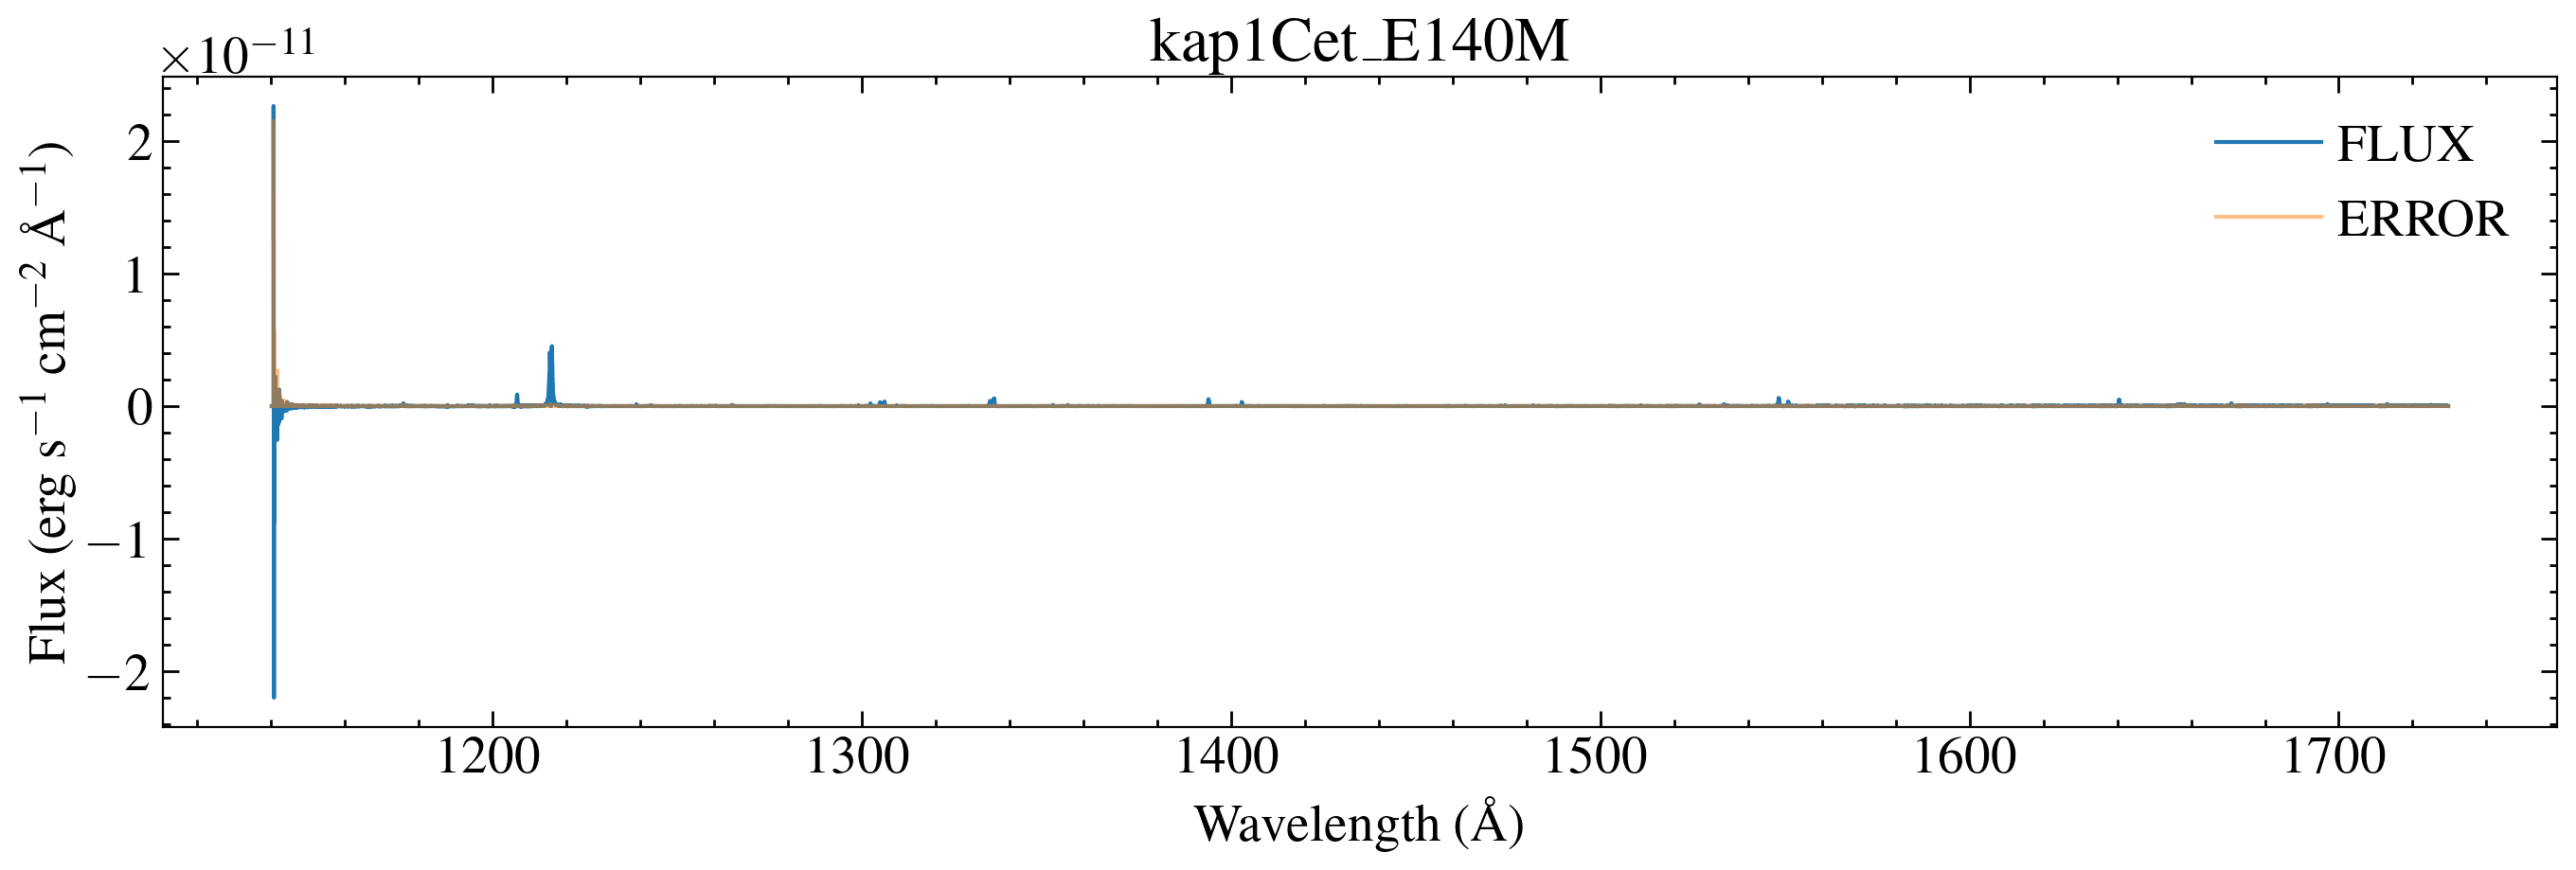

Spectrum saved as hlsp_muscles_hst_stis_kap1cet_e140m_v1_component-spec.fits


/home/david/work/meats/SEDs/prepare_stis.py:36: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / (e_array**2)
/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,


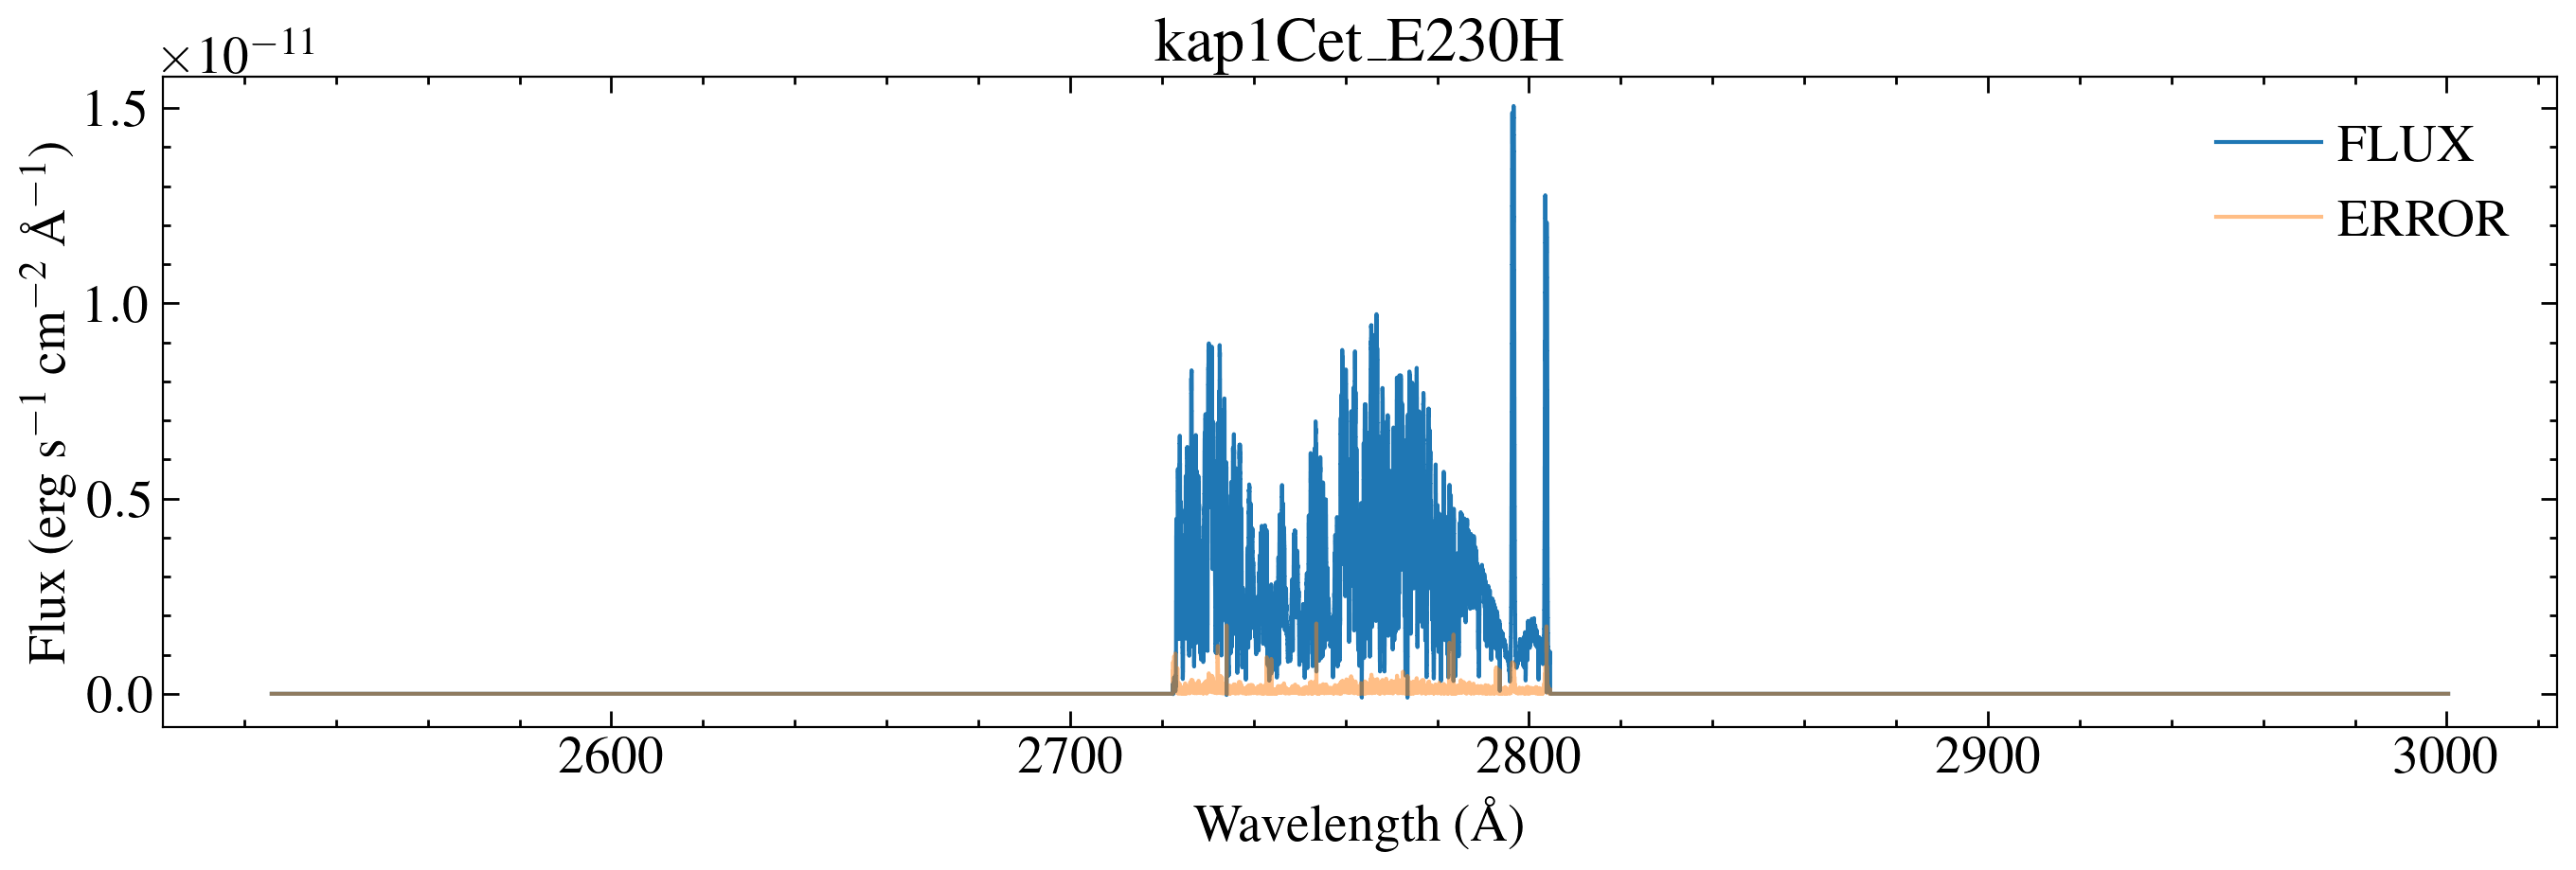

Spectrum saved as hlsp_muscles_hst_stis_kap1cet_e230h_v1_component-spec.fits


/home/david/work/meats/SEDs/prepare_stis.py:36: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / (e_array**2)
/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,


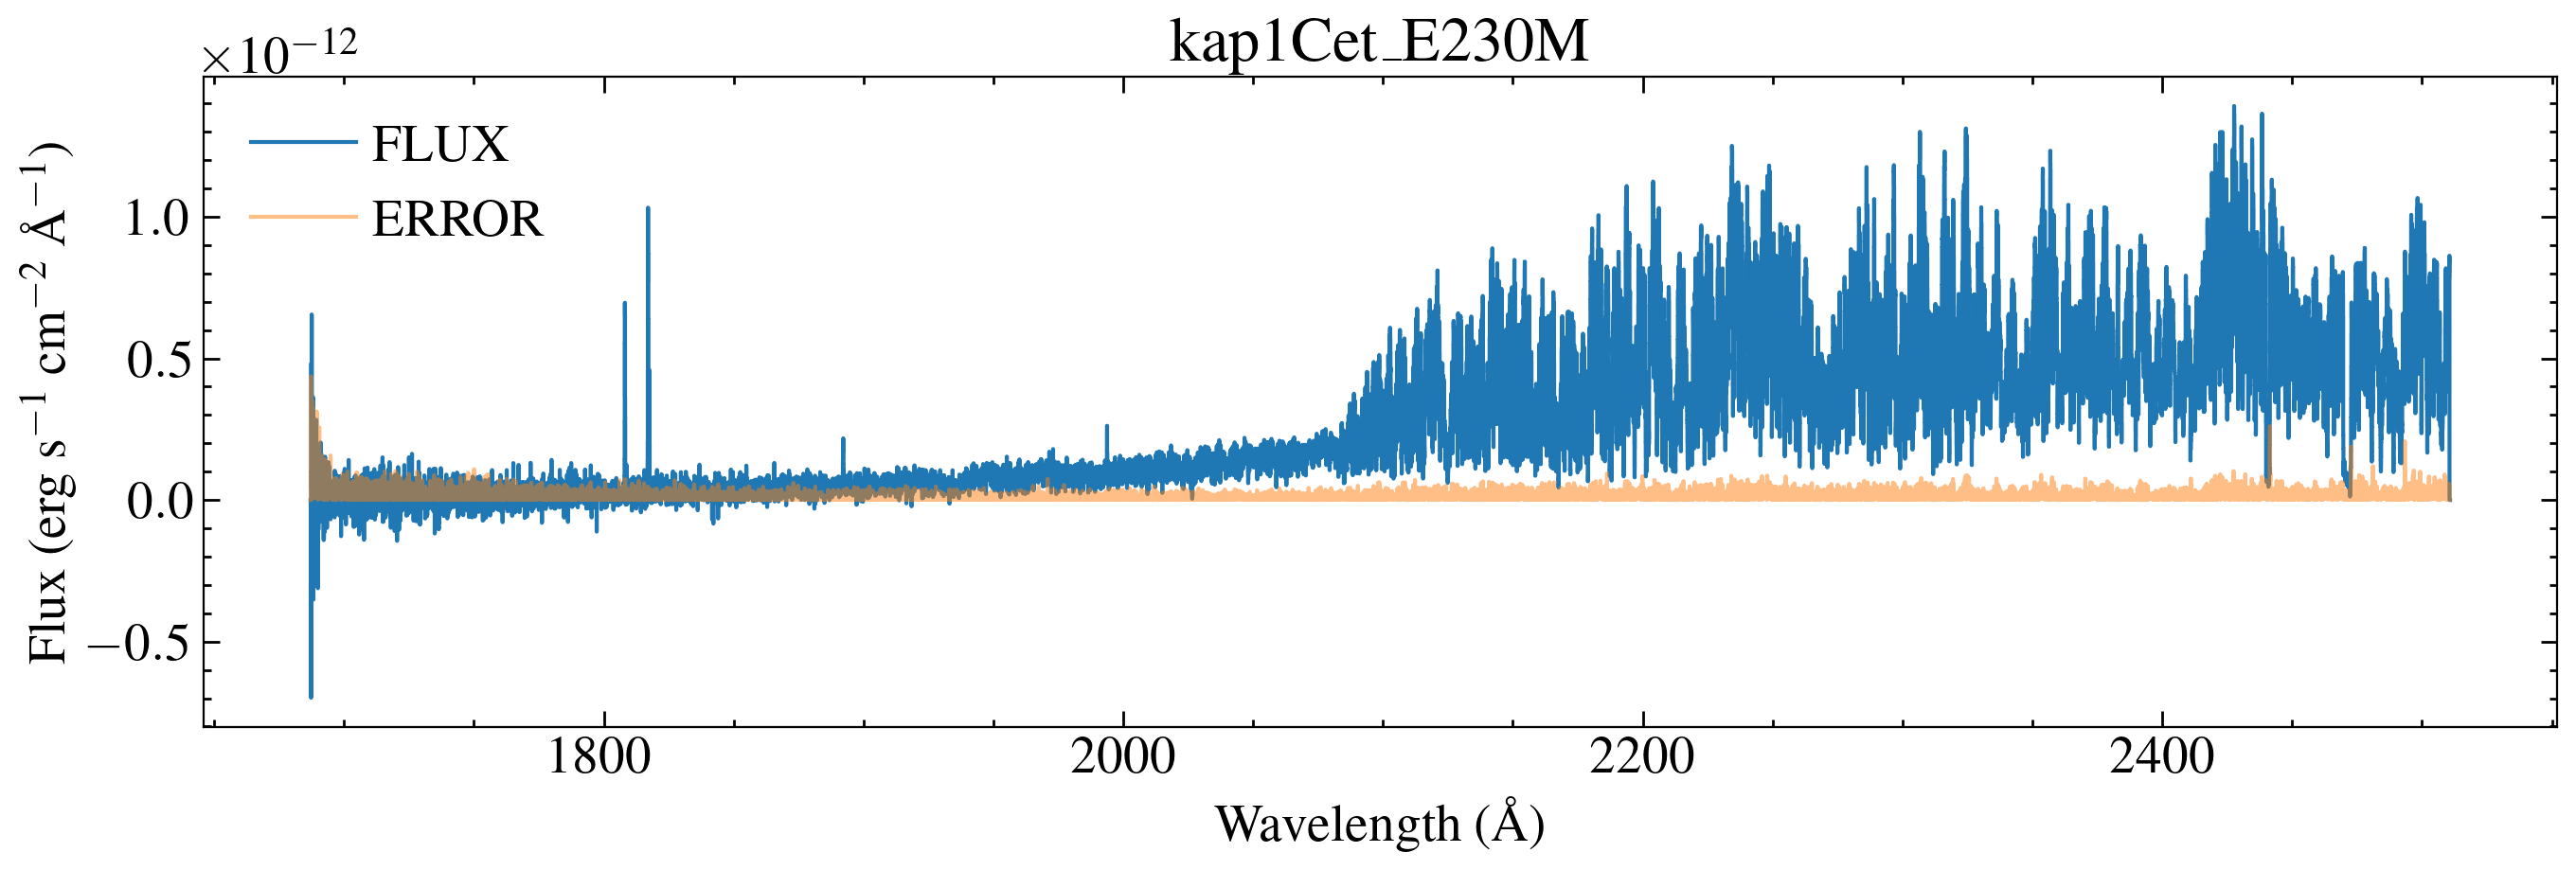

Spectrum saved as hlsp_muscles_hst_stis_kap1cet_e230m_v1_component-spec.fits


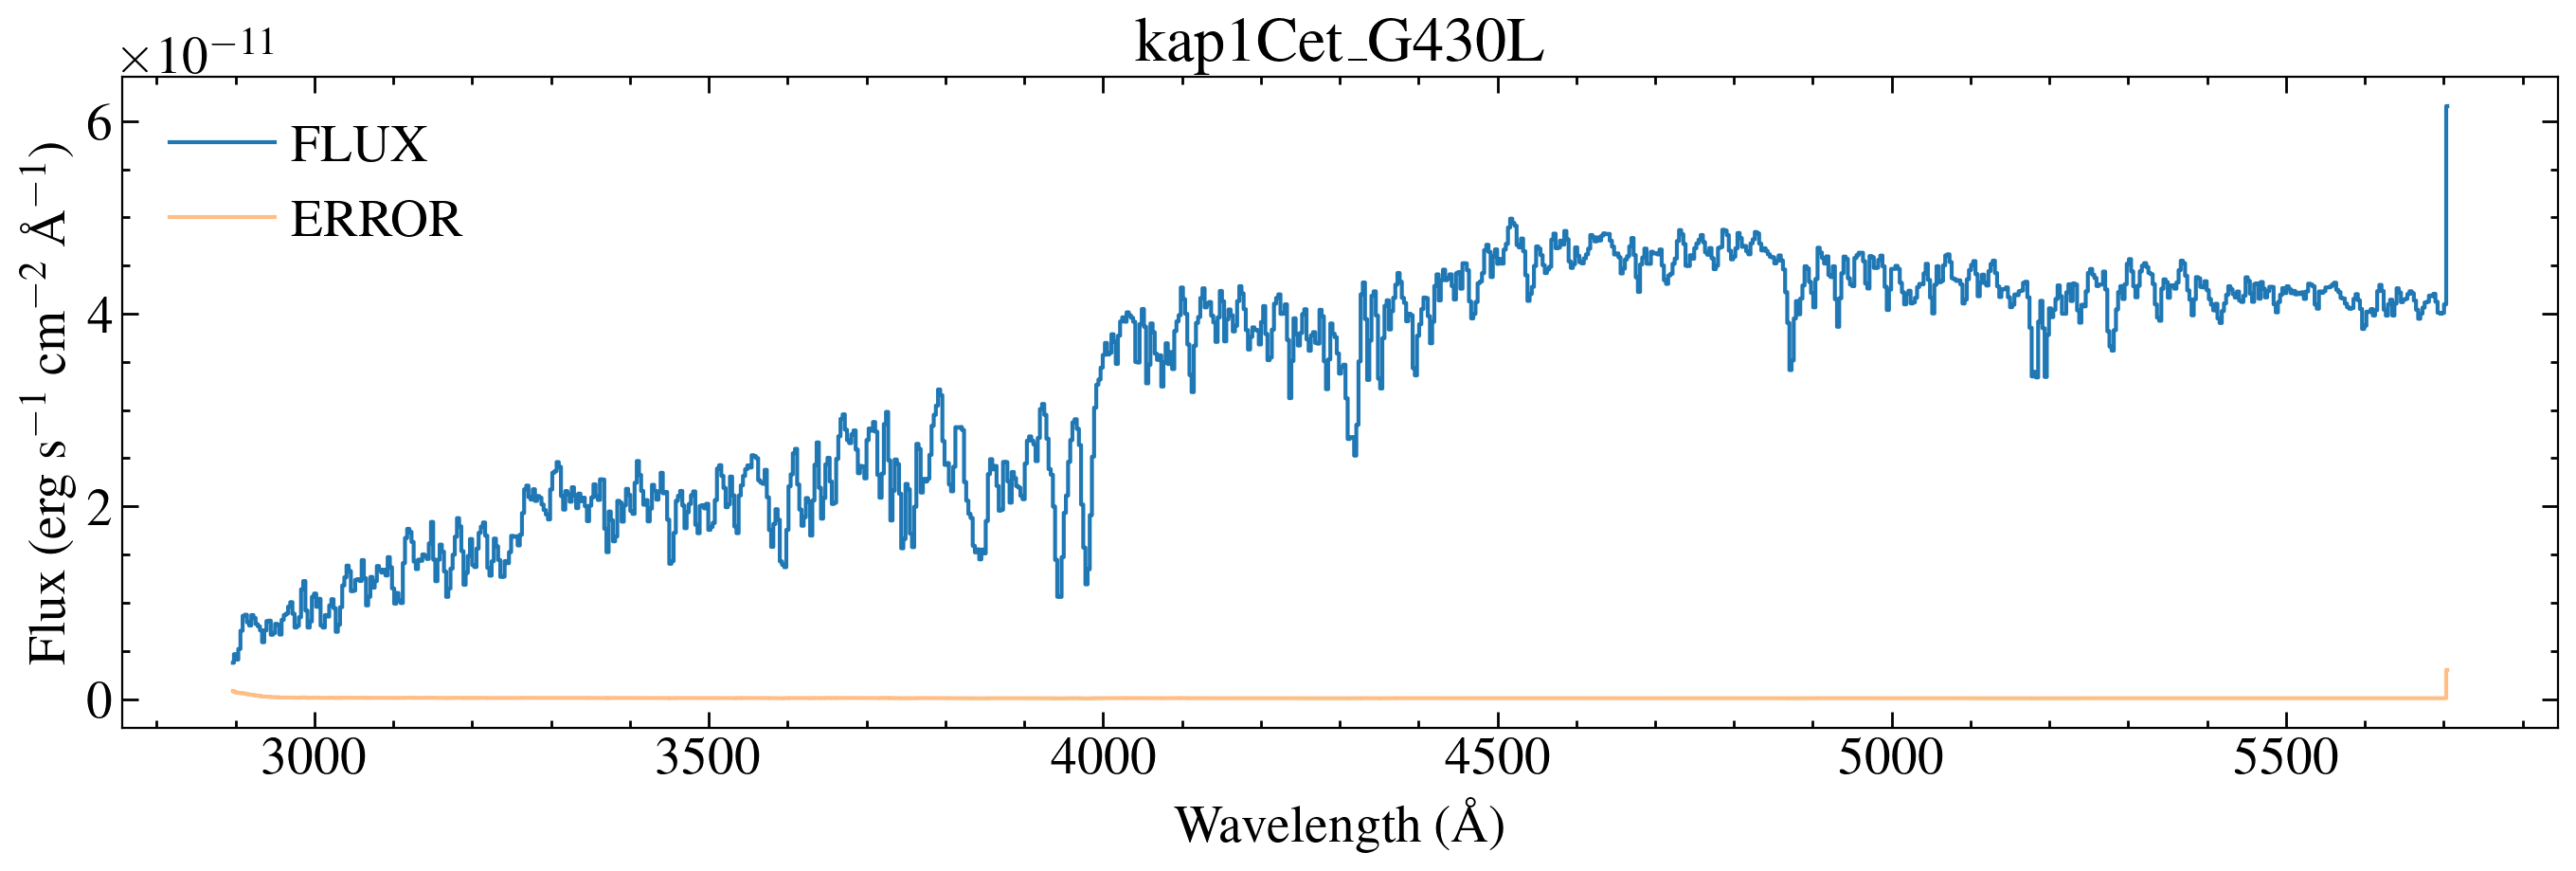

Spectrum saved as hlsp_muscles_hst_stis_kap1cet_g430l_v1_component-spec.fits


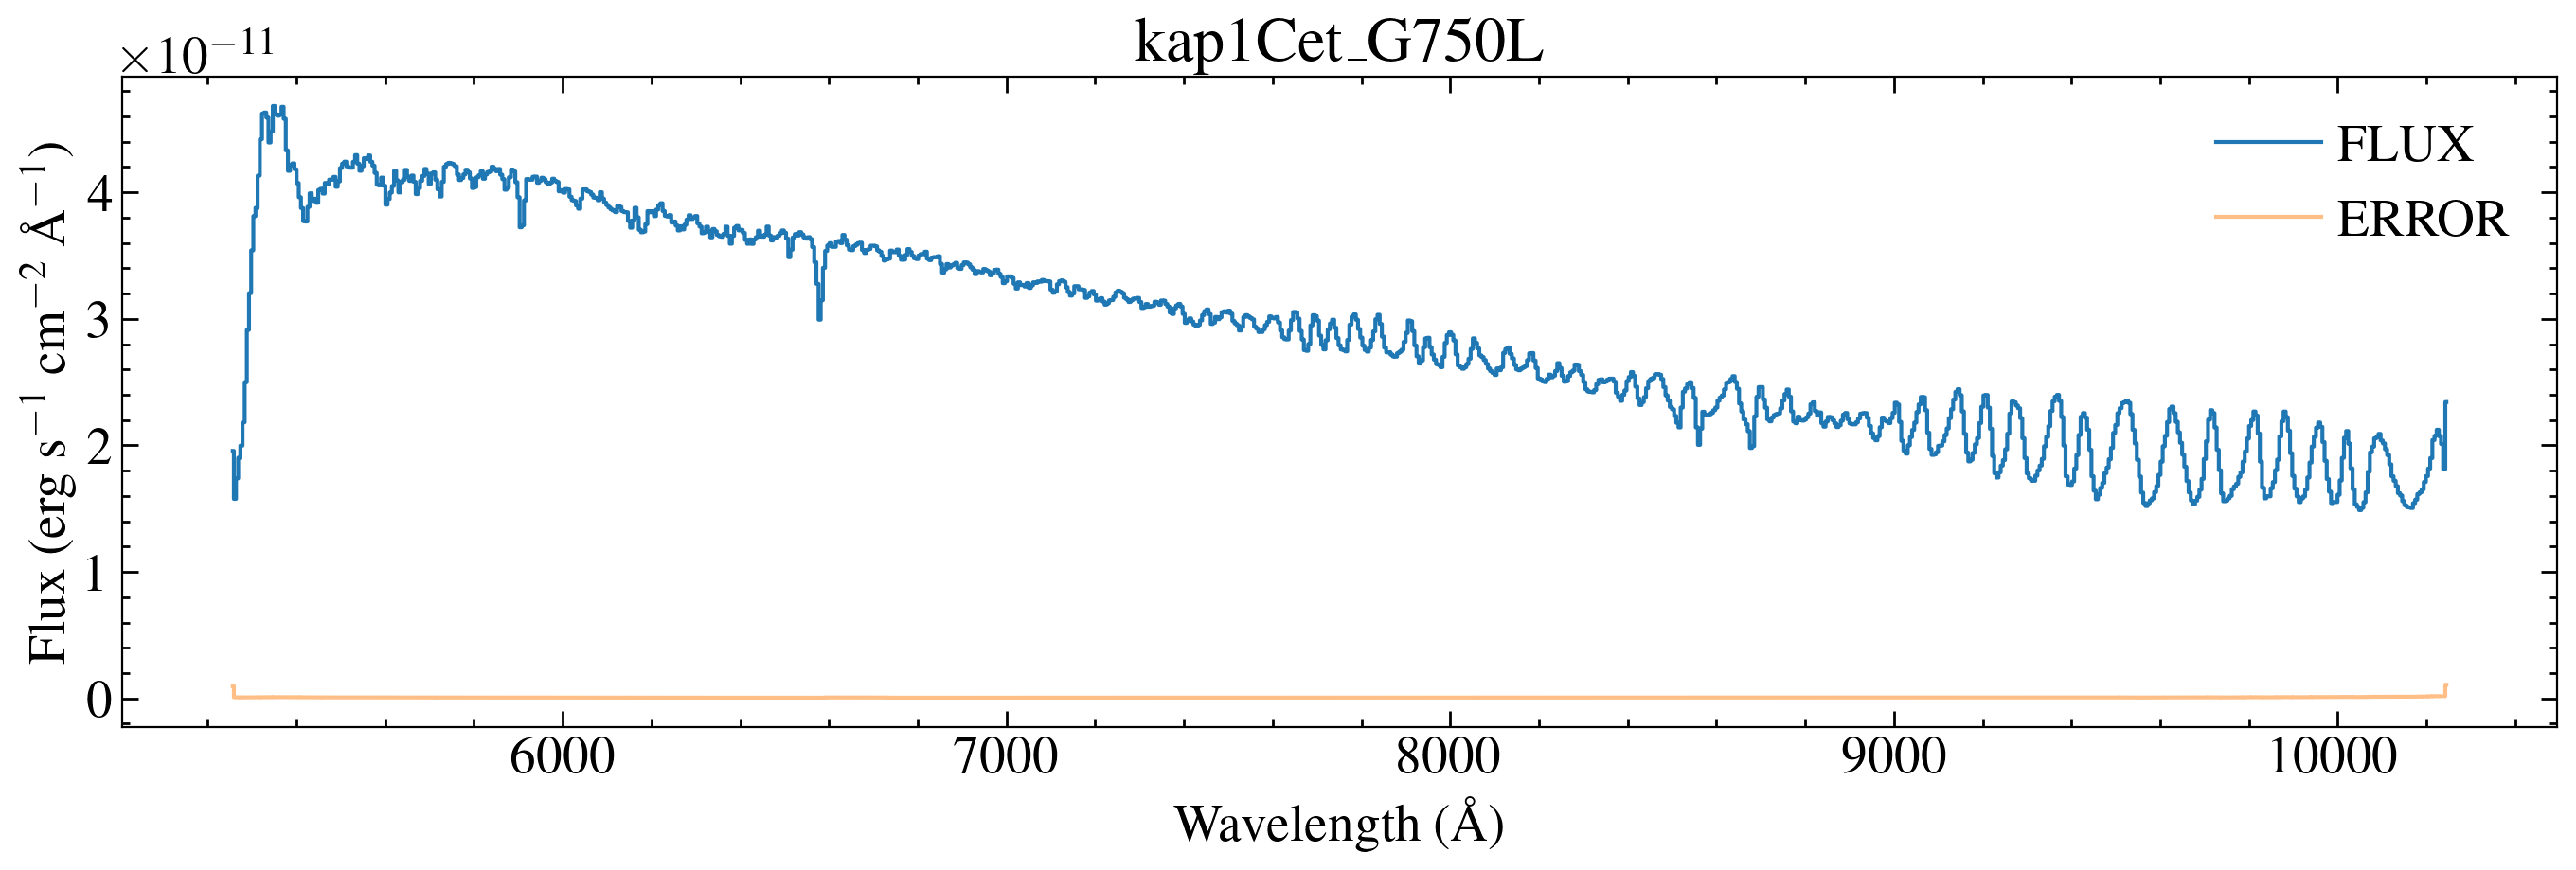

Spectrum saved as hlsp_muscles_hst_stis_kap1cet_g750l_v1_component-spec.fits


In [28]:
importlib.reload(prepare_stis)
savepath = 'draft_hlsp/kap1cet/'
hlsp = 'meats_hlsp_info.csv'
version = 1
star = 'kap1Cet'
x1dpath = '/media/david/2tb_ext_hd/hddata/hwo/data/hst/HIP-15457/stis/'
prepare_stis.make_stis_spectrum(x1dpath, version, hlsp, savepath=savepath, plot=True, save_ecsv=False, save_fits=True, star=star, nclip=5)

In [29]:
hdr = fits.getheader('draft_hlsp/kap1cet/hlsp_muscles_hst_stis_kap1cet_e140m_v1_component-spec.fits')
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'HST     '                                                            
INSTRUME= 'STIS    '                                                            
GRATING = 'E140M   '                                                            
APERTURE= '0.2X0.2 '                                                            
TARGNAME= 'kap1Cet '                                                            
RA_TARG =       49.84049476729                                                  
DEC_TARG=       3.370214901732                                                  
PROPOSID=                 8280                                                  
HLSPNAME= 'MUSCLES Extension

In [30]:
# hdul = fits.open('{}h_hd20630_uvsum_1x_51806_spc.fits'.format(uvpath))
# hdul.close()

In [31]:
# hdr['PR_INV_L'] = 'Youngblood'
# hdr['PR_INV_F'] = 'Allison'

# primary_hdu = fits.PrimaryHDU()
# primary_hdu.header = hdr
# hdu = hdul[1]#.data
# # hdu.header(hdul[1].header)
# newhdul = fits.HDUList([primary_hdu, hdu])
# newhdul.writeto('draft_hlsp/kap1cet/kap1cet_starcat_to_meats.fits', overwrite=True)



StarCat done! Need to make add Lya funtion - can that be done with add euv? And adapt prepare xmm for rgs spectrum.

In [32]:
hdul = fits.open(xpath)

In [33]:
hdul[0].header['XPROC0']

"rgsfluxer file='' nan=0 withaltnan=no format=dal mode=wavelength min=4 max=40 bins=3600 pha='0111410101/pps/P0111410101R1S004SRSPEC1003.FTZ 0111410101/pps/P0111410101R2S005SRSPEC1003.FTZ 0822791001/pps/P0822791001R1S005SRSPEC1003.FTZ 0822791001/pps/P0822791001R2S006SRSPEC1003.FTZ 0852780201/pps/P0852780201R1S004SRSPEC1003.FTZ 0852780201/pps/P0852780201R2S005SRSPEC1003.FTZ 0882160501/pps/P0882160501R1S004SRSPEC1003.FTZ 0882160501/pps/P0882160501R2S005SRSPEC1003.FTZ' bkg='' rmf='0111410101/pps/P0111410101R1S004RSPMAT1003.FTZ 0111410101/pps/P0111410101R2S005RSPMAT1003.FTZ 0822791001/pps/P0822791001R1S005RSPMAT1003.FTZ 0822791001/pps/P0822791001R2S006RSPMAT1003.FTZ 0852780201/pps/P0852780201R1S004RSPMAT1003.FTZ 0852780201/pps/P0852780201R2S005RSPMAT1003.FTZ 0882160501/pps/P0882160501R1S004RSPMAT1003.FTZ 0882160501/pps/P0882160501R2S005RSPMAT1003.FTZ' witharf=no arf=@ quality=0 tryspectrumgrid=yes # (rgsfluxer-1.10) [xmmsas_20210317_1624-19.1.0]"

In [34]:
# 0111410101
# 0882160501
# 0822791001
# 0852780201
fits.getheader('draft_hlsp/wasp-121/hlsp_muscles_xmm_epic_wasp-121_na_v1_component-spec.fits')

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'XMM     '                                                            
INSTRUME= 'EPIC    '                                                            
GRATING = 'NA      '                                                            
DETECTOR= 'MULTI   '                                                            
DETECT00= 'PN      '                                                            
DETECT01= 'MOS1    '                                                            
DETECT02= 'MOS2    '                                                            
FILTER  = 'MULTI   '                                                            
FILTER00= 'Medium  '        

In [35]:
specs = hdul[0].header['XPROC0']

In [36]:
specs

"rgsfluxer file='' nan=0 withaltnan=no format=dal mode=wavelength min=4 max=40 bins=3600 pha='0111410101/pps/P0111410101R1S004SRSPEC1003.FTZ 0111410101/pps/P0111410101R2S005SRSPEC1003.FTZ 0822791001/pps/P0822791001R1S005SRSPEC1003.FTZ 0822791001/pps/P0822791001R2S006SRSPEC1003.FTZ 0852780201/pps/P0852780201R1S004SRSPEC1003.FTZ 0852780201/pps/P0852780201R2S005SRSPEC1003.FTZ 0882160501/pps/P0882160501R1S004SRSPEC1003.FTZ 0882160501/pps/P0882160501R2S005SRSPEC1003.FTZ' bkg='' rmf='0111410101/pps/P0111410101R1S004RSPMAT1003.FTZ 0111410101/pps/P0111410101R2S005RSPMAT1003.FTZ 0822791001/pps/P0822791001R1S005RSPMAT1003.FTZ 0822791001/pps/P0822791001R2S006RSPMAT1003.FTZ 0852780201/pps/P0852780201R1S004RSPMAT1003.FTZ 0852780201/pps/P0852780201R2S005RSPMAT1003.FTZ 0882160501/pps/P0882160501R1S004RSPMAT1003.FTZ 0882160501/pps/P0882160501R2S005RSPMAT1003.FTZ' witharf=no arf=@ quality=0 tryspectrumgrid=yes # (rgsfluxer-1.10) [xmmsas_20210317_1624-19.1.0]"

In [37]:
phas=['0111410101/pps/P0111410101R1S004SRSPEC1003.FTZ', '0111410101/pps/P0111410101R2S005SRSPEC1003.FTZ', 
     '0822791001/pps/P0822791001R1S005SRSPEC1003.FTZ', '0822791001/pps/P0822791001R2S006SRSPEC1003.FTZ',
     '0852780201/pps/P0852780201R1S004SRSPEC1003.FTZ', '0852780201/pps/P0852780201R2S005SRSPEC1003.FTZ',
     '0882160501/pps/P0882160501R1S004SRSPEC1003.FTZ', '0882160501/pps/P0882160501R2S005SRSPEC1003.FTZ']

In [38]:
from astropy.time import Time

pha_list = []

phapath = '/media/david/2tb_ext_hd/hddata/hwo/data/xmm/kap1cet/'
for pha in phas:
    phahdr = fits.getheader('{}{}'.format(phapath, pha))
    expstart = Time(phahdr['DATE-OBS']).mjd
    expend = Time(phahdr['DATE-END']).mjd
    print(((expend - expstart)*u.d).to(u.s))
    pha_list.append('{}{}'.format(phapath, pha))
    


40119.99999980908 s
40113.99999966379 s
18613.00000017509 s
18606.000000424683 s
15908.999999868684 s
15908.999999868684 s
15912.999999546446 s
15910.999999707565 s


In [39]:
import prepare_xmm

In [40]:
hlsp

'meats_hlsp_info.csv'

In [41]:
importlib.reload(prepare_xmm)

hlsp = Table.read('meats_hlsp_info.csv')
version = 1

prepare_xmm.make_xmm_spectra(xpath, savepath, version, hlsp, apec_repo='', make_apec=False, save_ecsv=False, save_fits=True, rgs=True, pha_files = pha_list)

Spectrum saved as hlsp_muscles_xmm_rgs_hd20630_na_v1_component-spec.fits


/home/david/work/meats/SEDs/prepare_xmm.py:132: RuntimeWarning: invalid value encountered in cast
  f = [ci*1.99e-8/wi for ci, wi in zip(counts,w)]
/home/david/work/meats/SEDs/prepare_xmm.py:133: RuntimeWarning: invalid value encountered in divide
  e = (counts_err/counts)*f


In [42]:
# hdul = fits.open('draft_hlsp/kap1cet/hlsp_muscles_xmm_rgs_hd20630_na_v1_component-spec.fits')

In [43]:
# hdul.info()

In [44]:
# hdul[0].header

In [45]:
# hdul[1].header

In [46]:
# hdul[2].header

In [47]:
# hdul[2].data

In [48]:
# data = hdul[1].data
# data.names

In [49]:
# for name in data.names[1:]:
#     print(name)
#     plt.step(data['WAVELENGTH'], data[name], where='mid')
#     plt.show()

In [50]:
# hdul.close()

Ok looks good.

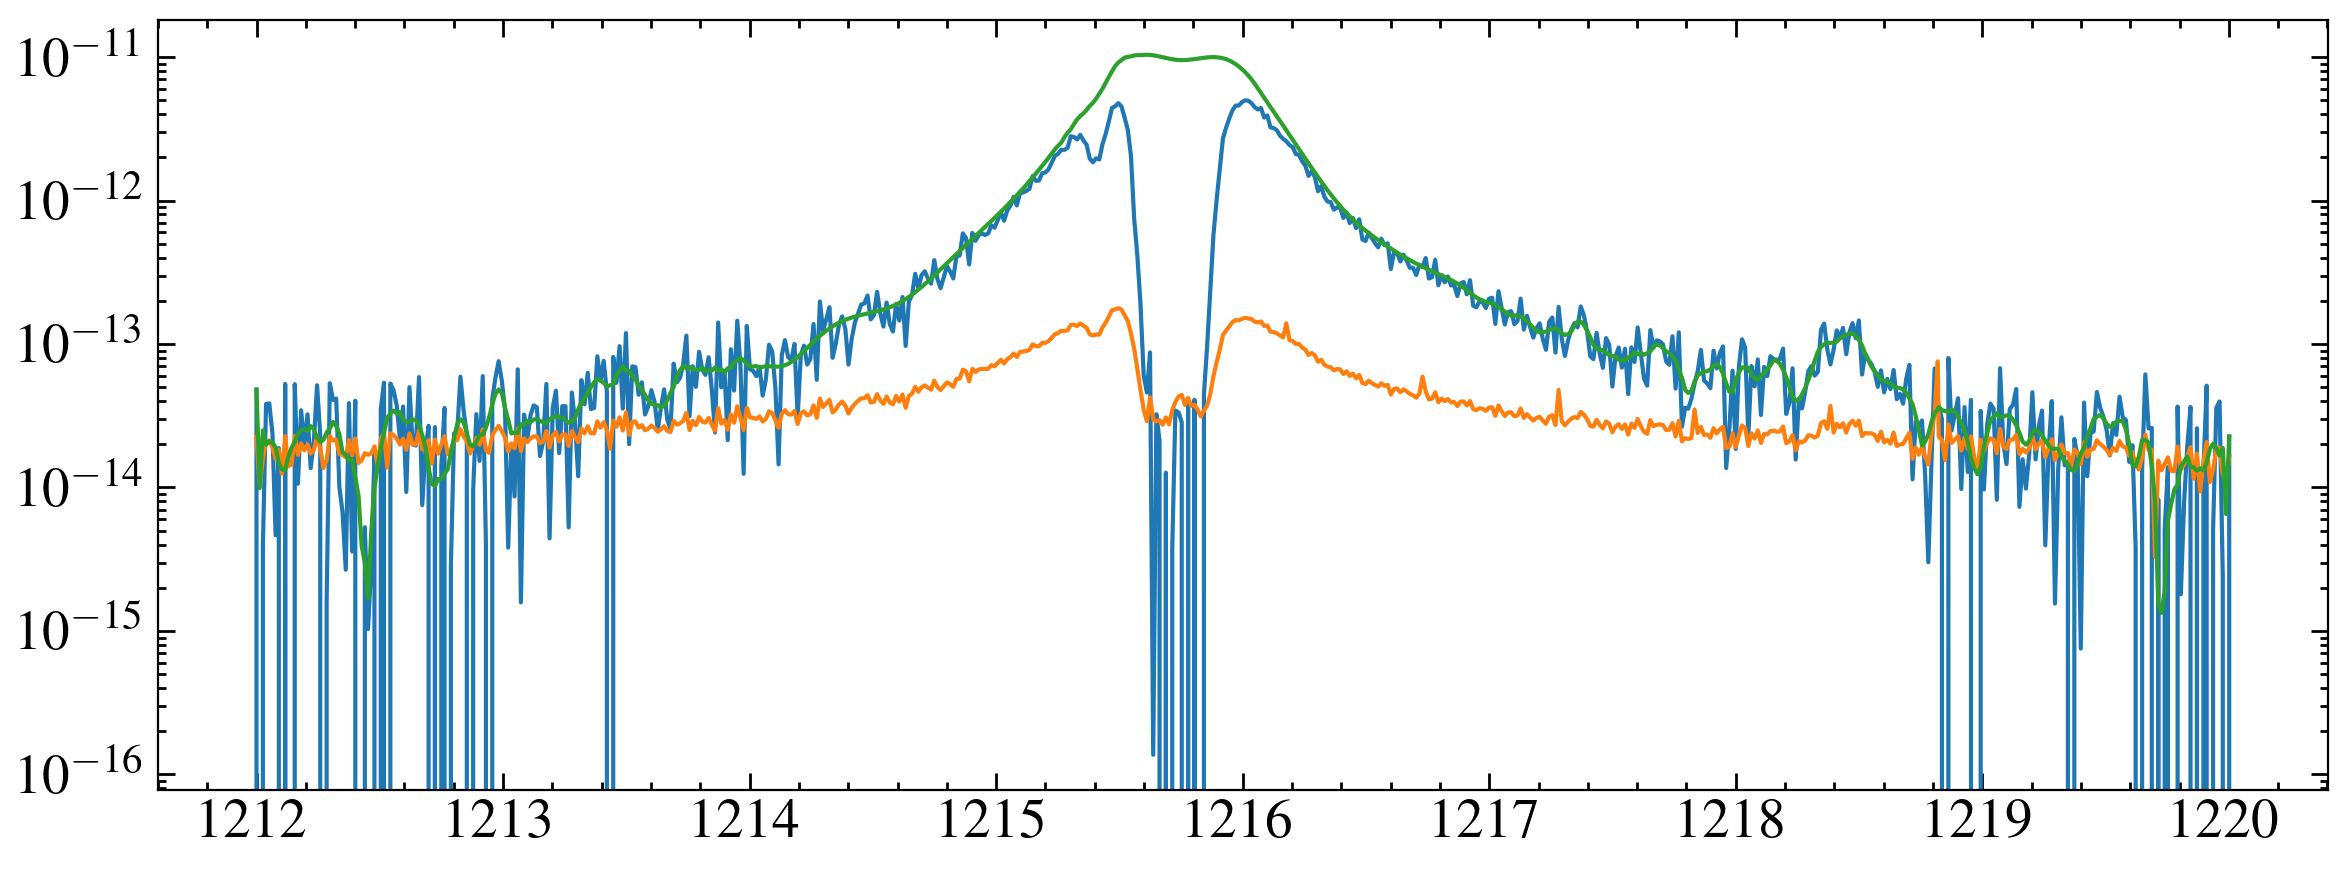

In [51]:
import prepare_model

hdr = fits.getheader('draft_hlsp/kap1cet/hlsp_muscles_hst_stis_kap1cet_e140m_v1_component-spec.fits', 0)
sed_data = Table(meta=hdr)

lyapath = '/media/david/2tb_ext_hd/hddata/hwo/data/lya/kap1cet/kcet_lya.txt'

lyaw, lyaf, lyae, lyamod = np.loadtxt(lyapath, unpack =True)
plt.plot(lyaw, lyaf)
plt.plot(lyaw, lyae)
plt.plot(lyaw, lyamod)
plt.yscale('log')

plt.show()
lyamask = (lyamod > 0.0)
# plt.plot(lyaw[lyamask], (lyaf/lyamod)[lyamask])
# print(np.max(lyaf))

#assuming a 10% uncertainty on each resel of the Lya model


savdat = Table([lyaw[lyamask], lyamod[lyamask], lyamod[lyamask]*0.1], names=['WAVELENGTH', 'FLUX', 'ERROR'])

savdat.write('models/kap1cet_lya.ecsv', format='ascii.ecsv', overwrite=True)
#prepare_model.make_model_spectrum('models/kap1cet_lya.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1.0, model_name='LYA')

In [52]:
#PHX

prepare_model.make_model_spectrum('models/kap1cet_phoenix_interpolated.ecsv', 1, sed_data,
                                  savepath = savepath, save_ecsv=False, save_fits=True, normfac=normfac.value, model_name='PHX')

Spectrum saved as hlsp_muscles_model_phx_kap1cet_na_v1_component-spec.fits


In [53]:
#DEM
prepare_model.make_model_spectrum('models/kap1cet_dem.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1, model_name='dem')


Spectrum saved as hlsp_muscles_model_dem_kap1cet_na_v1_component-spec.fits


Header file is very bad.

In [54]:
67108864*2

134217728

Making a model of the Mg ii lines.

In [55]:
# fitter = fitting.LevMarLSQFitter()

# fig, ax = plt.subplots(figsize=(7, 5))

# x = 'draft_hlsp/kap1cet/h_hd20630_uvsum_1x_51806_spc.fits'
# # print(fits.getheader(x, 0)['OPT_ELEM'])
# data = fits.getdata(x, 1)[0]
# # print(data['A2Center'])
# # root = fits.getheader(x, 0)['ROOTNAME']
# w, f, e= data['WAVE'], data['FLUX'], data['ERROR']
# # mask = w > 1250
# #     w, f, e = w[mask], f[mask], e[mask]
# ax.step(w, f, where='mid')
# # ax.step(w, e, where='mid')
# # plt.legend(frameon=True, loc=2)
# # plt.xticks(visible=False)
# ax.set_xlim(2790, 2810)
# # ax.set_ylim(0.3e-13, 0.99e-13)

# lines=[2796.35, 2803.53]
# [ax.axvline(line, ls='--', c='C2', alpha=0.5) for line in lines]
# ax.set_xlabel('Wavelength (\AA)')
# ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')



# mg2 = [2796.352, 2803.53]
# os = [6.08e-01, 3.03e-01]

# lines = np.copy(mg2)

# mask = (w > 2790) & (w < 2810)
# wn, fn, en = w[mask], f[mask], e[mask]

# # mod = models.Const1D(4e-14)
# mod = models.Polynomial1D(3)  
# for line in lines:
#     line_guess = (10*u.km/u.s).to(u.AA, equivalencies = u.doppler_optical(line*u.AA)).value
#     # mod = mod+  models.Gaussian1D(amplitude=2e-11, mean = line_guess, stddev=0.5)
#     mod = mod + models.Voigt1D(amplitude_L=3e-11, x_0 = line_guess) + models.Voigt1D(amplitude_L = -2e-11, x_0 = line_guess, fwhm_G=0.05, fwhm_L = 0.05)
# # mod += models.Gaussian1D(amplitude=1e-11, mean = 2800, stddev=10)

# def tiedfunc1(mod):
#     x_0 = mod.x_0_1.value+np.diff(lines)
#     # fwhm_G = mod.fwhm_G_1.value
#     return x_0

# def tiedfunc2(mod):
#     x_0 = mod.x_0_1.value
#     # fwhm_G = mod.fwhm_G_1.value
#     return x_0


# def tiedfunc3(mod):
#     x_0 = mod.x_0_3.value
#     # fwhm_G = mod.fwhm_G_1.value
#     return x_0


# mod.x_0_2.tied=tiedfunc2
# mod.x_0_3.tied=tiedfunc1
# mod.x_0_4.tied=tiedfunc3
    
# # def tiedfunc0(mod):
# #     mean = mod.mean_1.value+np.diff(lines)
# #     return mean

# # def tiedamp(mod):
# #     amplitude = mod.amplitude_1.value/(os[0]/os[1])
# #     return amplitude

# # def tiedstd(mod):
# #     stddev = mod.stddev_1.value
# #     return stddev

# # mod.mean_2.tied=tiedfunc0
# # mod.stddev_2.tied = tiedstd
# # mod.amplitude_2.tied = tiedamp


# mgfit = fitter(mod,wn, fn, maxiter=10000)
# wmod = np.arange(wn[0], wn[-1], 0.01)
# ax.plot(wmod, mgfit(wmod))

# print(mgfit)
# mgfit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
# print(mgfit_e)

# # obs_lam = mgfit[1].mean.value
# # dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

# # dv_e =  np.mean([abs(dv.value -((obs_lam+mgfit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
# #                 abs(dv.value -((obs_lam-mgfit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

# # print(dv, dv_e)

# # mgdv, mgdve = dv.value, dv_e

# # for line in lines:
# #         obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
# #         ax.axvline(obs_line, c='C3', ls='--', alpha=0.5)


# fig.tight_layout()



Checking all NUV data to try to establish the NUV variability range for scaling.

In [56]:
g230lb = glob.glob('reextractions/kap1cet/o8ru3x0*0_new_x1d.fits')
g230lb

['reextractions/kap1cet/o8ru3x010_new_x1d.fits',
 'reextractions/kap1cet/o8ru3x020_new_x1d.fits']

4.972134398375671e-10 2.3264763484495604e-10 2.137195334777103


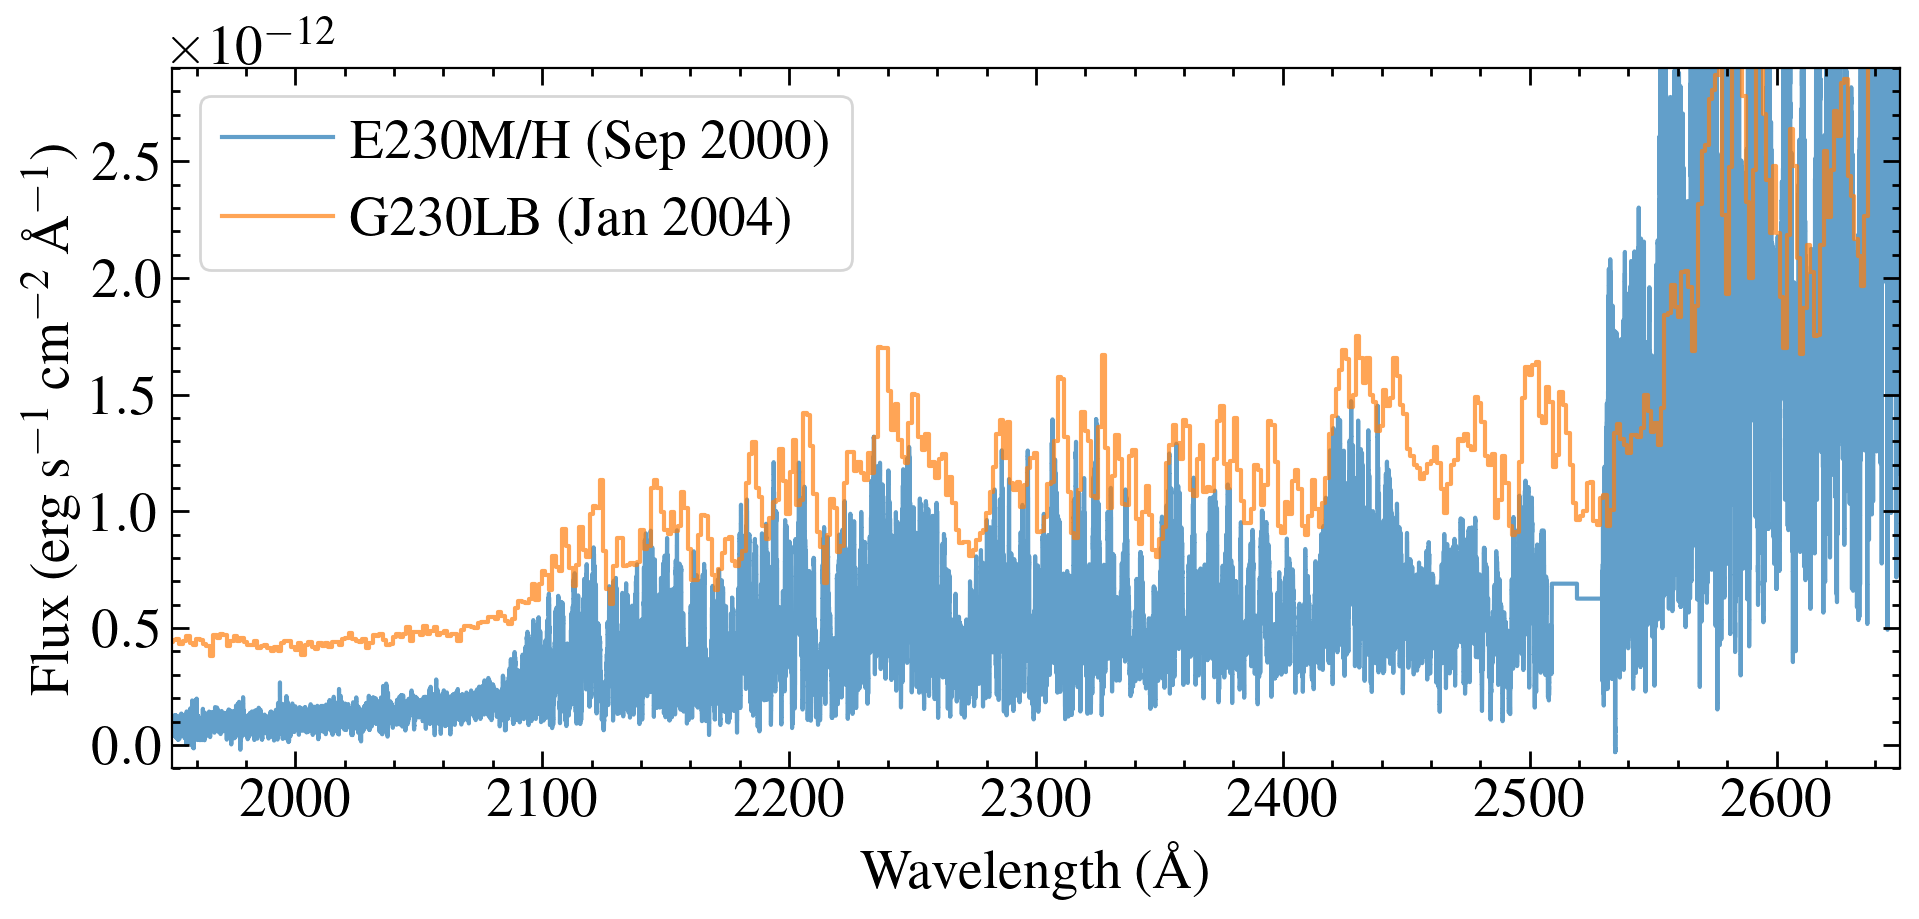

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.step(w_uv[(f_uv !=0.0)], f_uv[(f_uv !=0.0)], where='mid', alpha = 0.7, zorder=-1, label = 'E230M/H (Sep 2000)')


for x in g230lb[0:1]:
    data = fits.getdata(x,1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = (f < 2e-11)
    ax.step(w[mask], f[mask], where='mid', alpha=0.7, label = 'G230LB (Jan 2004)')
    mask = (w > 2000) & (w < 2500)
    int_low = np.trapz(f[mask], w[mask])
    
ax.set_xlim(1950, 2650)
ax.set_ylim(-0.1e-12, 2.9e-12)
# ax.set_yscale('log')

ax.set_xlabel('Wavelength (\AA)')
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

ax.legend(frameon=True)

fig.tight_layout()

mask = (w_uv > 2000) & (w_uv < 2500)
int_high = np.trapz(f_uv[mask], w_uv[mask])

print(int_low, int_high, int_low/int_high)
fig.savefig('plots/k1c_2epoch_nuv.pdf')

IUE ascii files.

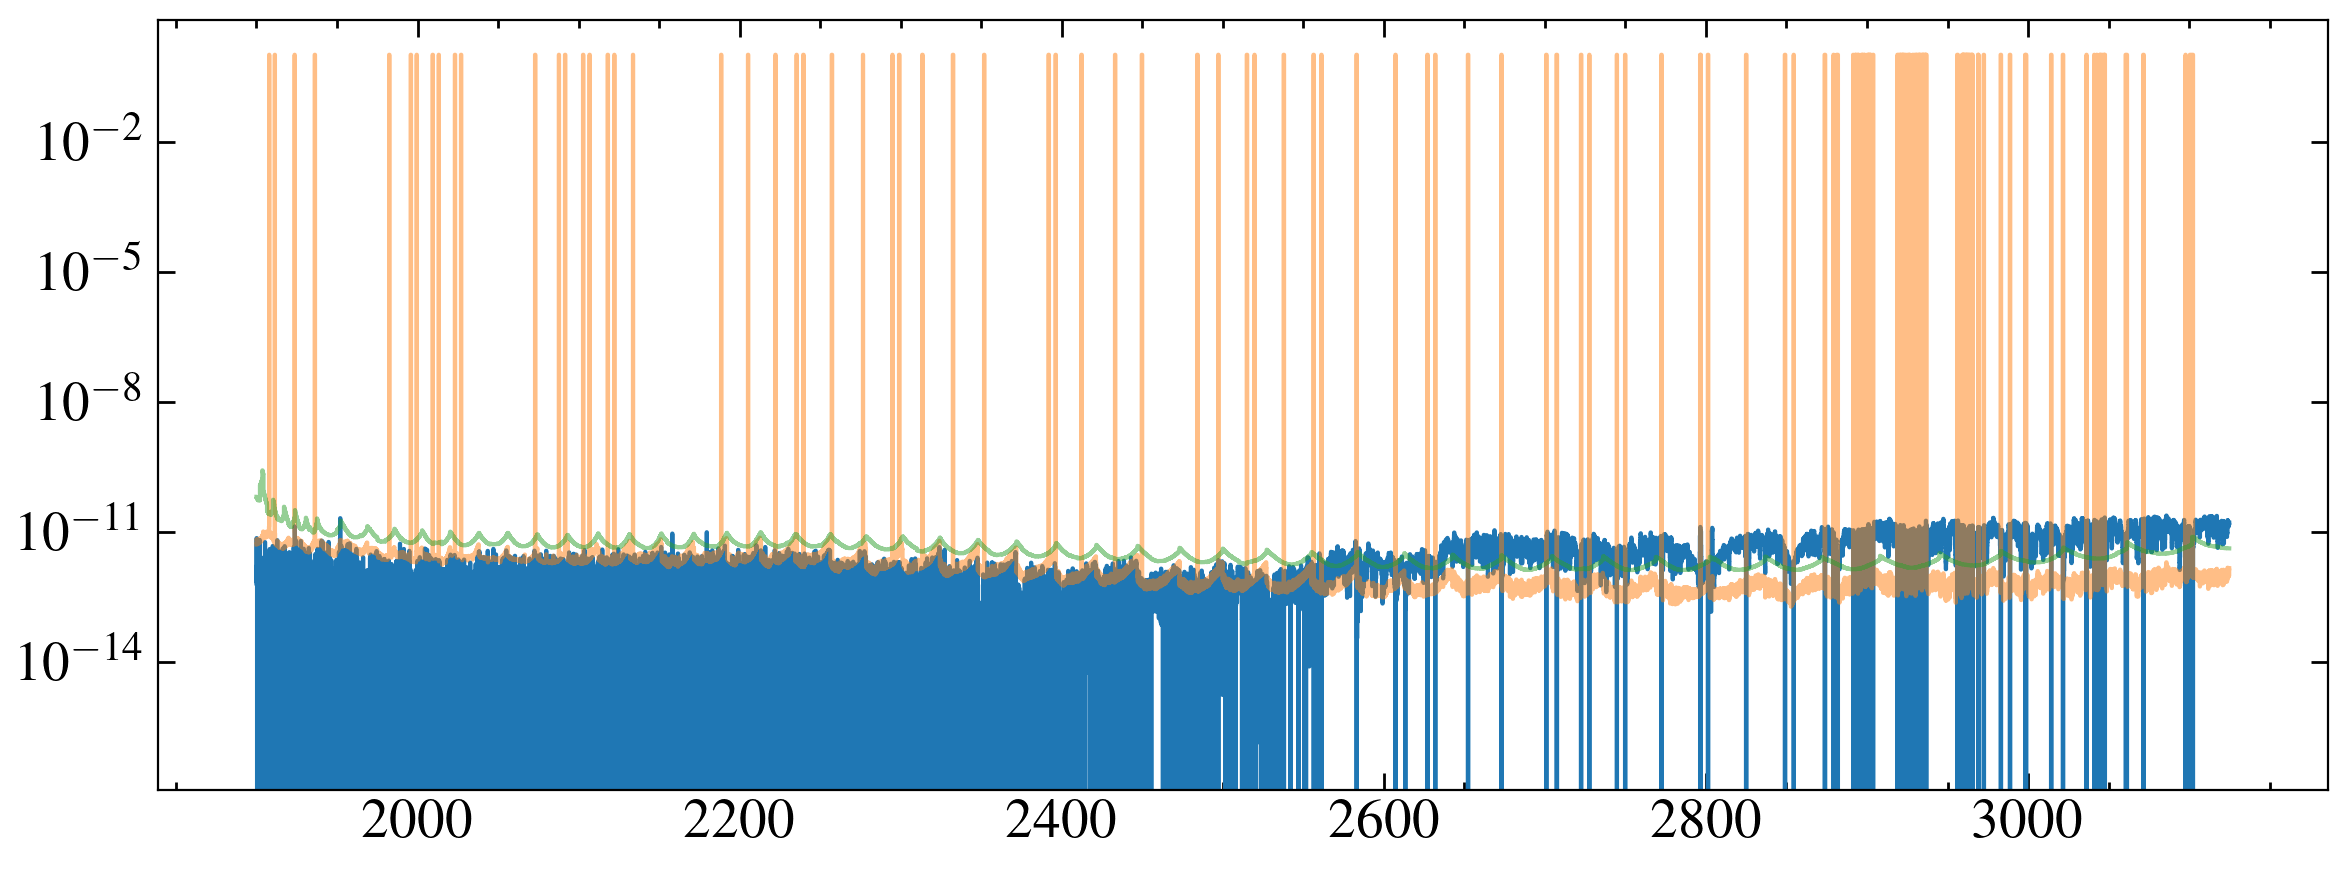

In [58]:
atestpath = '/media/david/2tb_ext_hd/hddata/hwo/data/iue/HIP_15457/mast_ascii/'
# adata = Table.read('{}lp29182'.format(atestpath), format='ascii.basic', data_start=20, guess=False)
f, e1, e2 = np.loadtxt('{}lp29182'.format(atestpath), unpack =True, skiprows=19)
w = [0.1*k+1900.0 for k in np.arange(0, 12250)]

plt.step(w, f, where='mid')
plt.step(w, e1, where='mid', alpha=0.5)
plt.step(w, e2, where='mid', alpha=0.5)
plt.yscale('log')